# Imports

In [0]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plab
import pickle
import itertools
import datetime
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.utils.fixes import signature

now = datetime.datetime.now()
np.warnings.filterwarnings('ignore') # Due to the presence of NaN values

In [0]:
from google.colab import files

files.upload() #upload GTD.zip

In [29]:
#unzip dataset and region dictionary
!unzip GTD.zip

Archive:  GTD.zip
replace gtd_reduxed_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace region_dict.pickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
df = pd.read_csv('gtd_reduxed_v2.csv', encoding = 'ISO-8859-1')
pickle_in = open("region_dict.pickle","rb")
loaded_region_dict = pickle.load(pickle_in)

# Esparsidade

In [0]:
columns = ['imonth', 'iday', 'extended', 'region',
       'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1',
       'natlty1', 'weaptype1', 'nkill',
       'nkillter', 'nwound', 'nwoundte']

columns2 =['targsubtype1', 'natlty1']
total_lines = 181691
total_cells = 15 * total_lines
counter = 1
nan_dict = {}

for i in df.index:
  for j in columns:
    if j not in nan_dict:
      nan_dict[j]=0
        
    val = df.loc[i,j]
    try:
      if np.isnan(val):
        nan_dict[j]+=1
    except:
      print('There was an exception running column ' + str(j))
    perc_calc = (counter/total_cells)*100
    if(perc_calc % 10 == 0):
      print('Done ' + str(perc_calc) + '%.')
    counter+=1
  

Done 20.0%.
Done 40.0%.
Done 60.0%.
Done 80.0%.
Done 100.0%.


In [0]:
total_nans = 0

for x,y in nan_dict.items():
  spar = (y/total_lines)*100
  total_nans += y
  print()
  print('Current Field: ' + x)
  print('Number of NaNs found: ' + str(y))
  print('Sparsity of collumm: ' + str(spar))

total_spar = (total_nans/total_cells)*100
print()
print('Total Sparity: ' + str(total_spar))



Current Field: imonth
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: iday
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: extended
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: region
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: success
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: suicide
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: attacktype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: targtype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: targsubtype1
Number of NaNs found: 10373
Sparsity of collumm: 5.709143545910364

Current Field: natlty1
Number of NaNs found: 1559
Sparsity of collumm: 0.8580502061191804

Current Field: weaptype1
Number of NaNs found: 0
Sparsity of collumm: 0.0

Current Field: nkill
Number of NaNs found: 10313
Sparsity of collumm: 5.676120446252153

Current Field: nkillter
Number of NaNs found: 66958
Sparsity o

#Catalogar Dataset

##Dimensionalidade
- 22 Colunas

##Esparsidade
- Dataset denso, aproximadamente 6.41% de esparsidade total, não foi considerado valores a 0 como possíveis influentes para uma coluna esparsa, visto que este valor é sempre considerável no contexto do modelo. 
Colunas com maior valor de esparsidade:
 - targsubtype1 - 5.71%;
 - nkill - 5.68%;
 - nkillter - 36.85%;
 - nwound - 8.98%;
 - nwoundte - 38.06%
 
##Resolução
- Não existem colunas com valores unitários (preço, temperatura, peso, etc..)

##Tamanho

- 181691 entries


#Target label

A nossa target label será 'region' sendo o objetivo da aplicação dos modelos a previsão do local onde ocorreu o ataque tendo em conta a avaliação de todas as outras features relevantes existentes no dataset.

#Catalogar Features

##Tipo
- Discreto:
  - iyear; imonth; iday; country; region; attacktype1; targtype1; targsubtype1; natlty1; weaptype1; nkill; nkillter; nwound; nwoundte 
- Binário:
  - extended; success; suicide;




# Análises estatísticas
- Média
- Moda
- Variância
- Histogramas ( somento para features numéricas )

Average value of imonth is: 6.0 and mode is : 5
Variance is :  11.5

 Histogram 



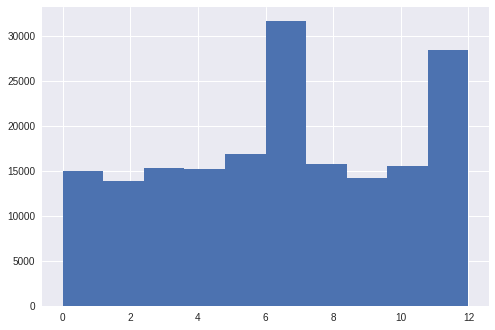




Average value of iday is: 16.0 and mode is : 15
Variance is :  77.7

 Histogram 



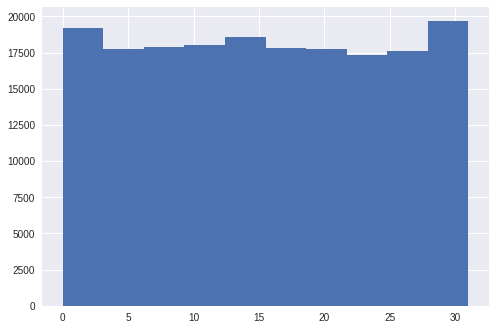




Average value of extended is: 0.0 and mode is : 0
Variance is :  0.0

 Histogram 



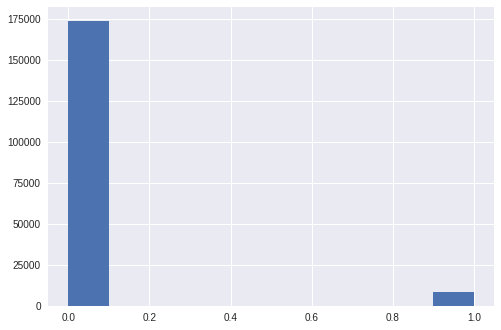




Average value of region is: 7.0 and mode is : 10
Variance is :  8.6

 Histogram 



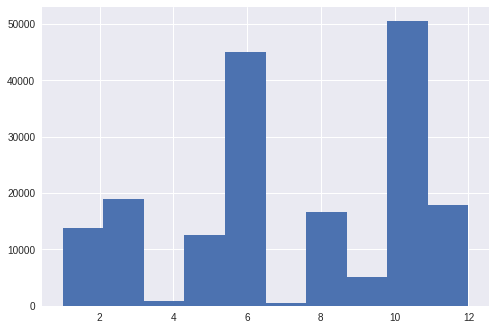




Average value of success is: 1.0 and mode is : 1
Variance is :  0.1

 Histogram 



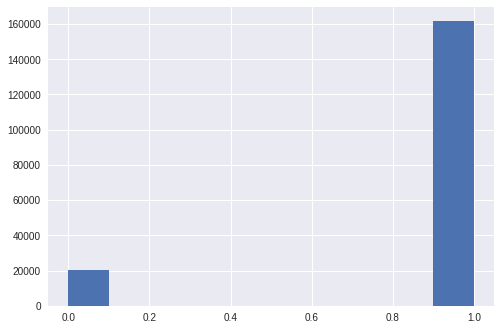




Average value of suicide is: 0.0 and mode is : 0
Variance is :  0.0

 Histogram 



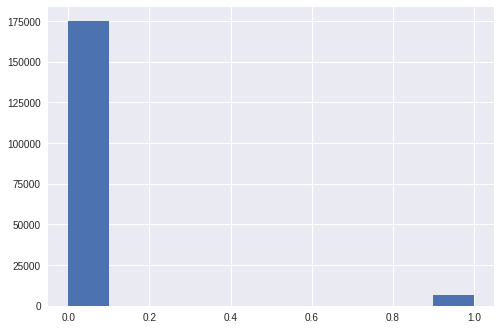




Average value of attacktype1 is: 3.0 and mode is : 3
Variance is :  3.7

 Histogram 



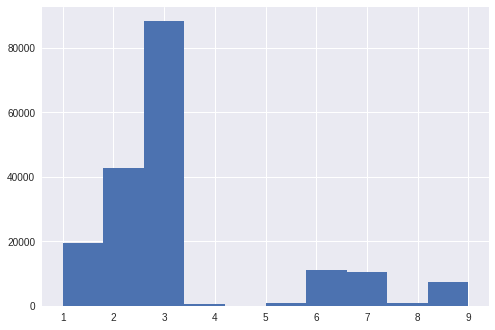




Average value of targtype1 is: 8.0 and mode is : 14
Variance is :  44.3

 Histogram 



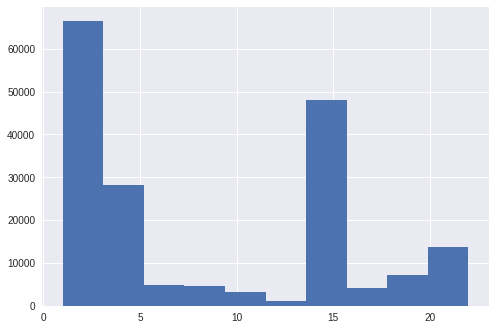




Average value of targsubtype1 is: 47.0 and mode is : 67.0
Variance is :  958.1

 Histogram 



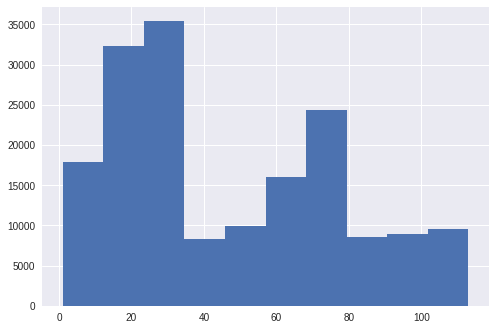




Average value of natlty1 is: 128.0 and mode is : 95.0
Variance is :  7974.3

 Histogram 



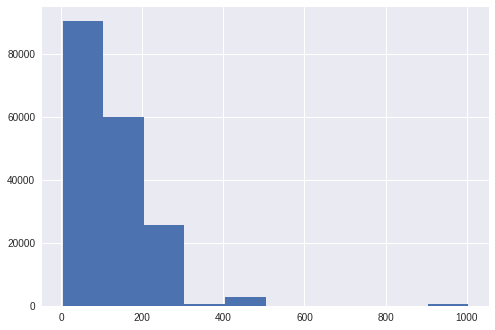




Average value of weaptype1 is: 6.0 and mode is : 6
Variance is :  4.7

 Histogram 



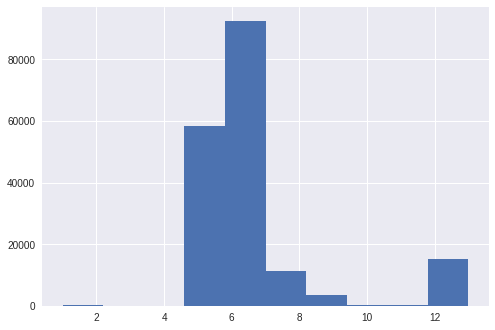




Average value of nkill is: 2.0 and mode is : 0.0
Variance is :  133.3

 Histogram 



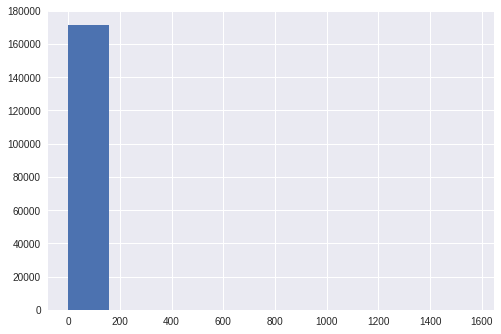




Average value of nkillter is: 1.0 and mode is : 0.0
Variance is :  17.6

 Histogram 



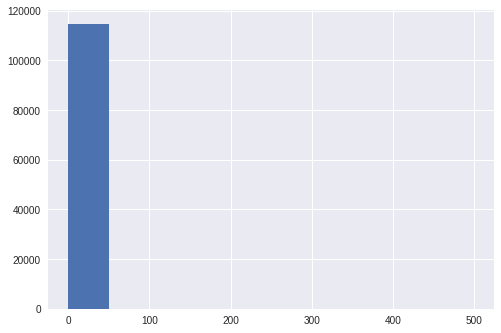




Average value of nwound is: 3.0 and mode is : 0.0
Variance is :  1292.4

 Histogram 



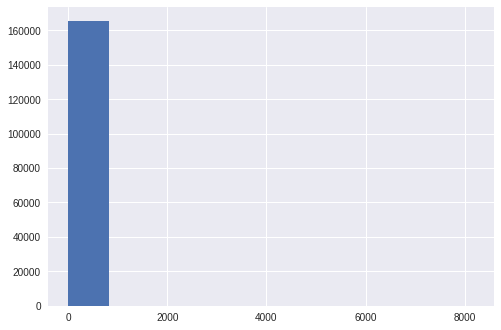




Average value of nwoundte is: 0.0 and mode is : 0.0
Variance is :  2.2

 Histogram 



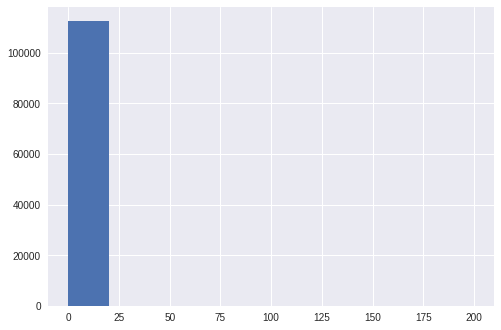

In [0]:
arrCompleteNum = [2,3,4,5,7,8,9,11,13,15,17,19,20,21,22]

for i in arrCompleteNum:
  mean = np.mean(df.iloc[:,i])
  mode = df.iloc[:,i].mode()
  print('Average value of ' + df.columns.values[i] +' is: ' + str(np.around(mean)) + ' and mode is : ' + str(mode[0]))

  variance = np.var(df.iloc[:,i])
  print('Variance is :  ' + str(np.around(variance,1)))

  minVal = np.min(df.iloc[:,i])
  maxVal = np.max(df.iloc[:,i])

  print('\n Histogram \n')
  plt.hist(df.iloc[:,i], range=(minVal,maxVal))
  plt.show()
  print('\n\n')


# Preparação do dataset
- Divisão do target e features
- Tratamento de valores inoperáveis existentes
- Train/test split

In [32]:
### DATA PREPARATION ###
%%time

targets = df['region'].unique()
df_test = df.loc[0:,['region','imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]

features = list(df_test.columns[1:])
df_test.replace([np.inf, -np.inf], np.nan)


# modelo que subsitui valores infinitos e NaNs pelo valor mais comum de modo a permitir a aplicaçao do modelo de classificação 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

y = df_test['region']
X = df_test[features]

imp_mean.fit(X,y)
X = imp_mean.transform(X)

# dataframe used to make predictions
df_predict = pd.DataFrame(X.reshape(-1,14),columns =df_test.columns[1:] )

if(np.any(np.isnan(df_predict)) == False and np.all(np.isfinite(df_predict)) == True):
  print("All invalid values removed")


# divisao train / test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# divisao train / validation
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42)

print("\n" + str(now) + "\n")

All invalid values removed

2019-01-28 23:28:43.452647

CPU times: user 899 ms, sys: 35.9 ms, total: 935 ms
Wall time: 940 ms


In [0]:
### learning curve function ###

def plotCurve (estimator,title, X,y,slice1,train_sizes=np.linspace(.1, 1.0, 5),):
 
  ylim = (0.7,1.01)
  
  plt.figure()
  
  plt.ylim
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X[0:slice1], y[0:slice1], cv=5, n_jobs=4, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.title(title + " " + str(test_scores_mean))

  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
  
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
  
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
  
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

  plt.legend(loc="best")
  return plt
  

In [0]:
### confusion matrix function ###

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    TPR = TP/(TP+FN)
    print("Sensitivity, hit rate, recall, or true positive rate; TPR= "  + str(TPR.mean()))
    
    TNR = TN/(TN+FP) 
    print("Specificity or true negative rate; TNR= "  + str(TNR.mean()))
    
    PPV = TP/(TP+FP)
    print("Precision or positive predictive value; PPV= "  + str(PPV.mean()))

    NPV = TN/(TN+FN)
    print("Negative predictive value; NPV = " + str(NPV.mean()))

    FPR = FP/(FP+TN)
    print("Fall out or false positive rate; FPR= " + str(FPR.mean()))

    FNR = FN/(TP+FN)
    print("False negative rate; FNR=" + str(FNR.mean()))

    FDR = FP/(TP+FP)
    print("False discovery rate; FDR= " + str(FDR.mean()))

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Overal accuracy; ACC= " + str(ACC.mean()))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


#DECISION TREE

In [34]:
## Using cross validation to find optimal hyper-parameter value for min_samples_split // DECISION TREE
%%time
sample_split = 20
score_result = []
highest_score_test = 0

for i in range (15):
  dt = DecisionTreeClassifier(min_samples_split=sample_split, random_state=99)
  scores = cross_val_score(dt,X_train,y_train,cv=5)
  print("Average value for "+ str(sample_split) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  
  if(scores.mean() > highest_score_test):
    highest_score_test = scores.mean()
    print(str(sample_split) + " Is the new best tree split with score test: " + str(highest_score_test)+"\n")
    
  sample_split +=4
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 20 is : 0.9500749992475093
20 Is the new best tree split with score test: 0.9500749992475093

Average value for 24 is : 0.9502507923117112
24 Is the new best tree split with score test: 0.9502507923117112

Average value for 28 is : 0.950686493827004
28 Is the new best tree split with score test: 0.950686493827004

Average value for 32 is : 0.9510610803000145
32 Is the new best tree split with score test: 0.9510610803000145

Average value for 36 is : 0.9509846130954749
Average value for 40 is : 0.9510534084531322
Average value for 44 is : 0.951252172358104
44 Is the new best tree split with score test: 0.951252172358104

Average value for 48 is : 0.9511528070611653
Average value for 52 is : 0.9511222748125177
Average value for 56 is : 0.9511605098781484
Average value for 60 is : 0.9511299197807093
Average value for 64 is : 0.9508088442815115
Average value for 68 is : 0.9505794970003032
Average value for 72 is : 0.9507323896363618
Average value for 76 is : 0.95059476911

In [36]:
### DECISION TREE ###
%%time
dt = DecisionTreeClassifier(min_samples_split=44, random_state=99)
dt.fit(X_train, y_train)

score_train = dt.score(X_train, y_train)
score_test = dt.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))
print("\n" + str(now) + "\n")

Score train: 0.9599513820939335
Score test: 0.9529431189630975

2019-01-28 23:28:43.452647

CPU times: user 890 ms, sys: 3.93 ms, total: 894 ms
Wall time: 895 ms


8000
16000
24000
32000
40000
48000
56000
64000
72000
80000
88000
96000
104000
112000
120000
128000
136000
144000
152000
160000
168000
176000
173690

2019-01-28 15:15:43.109175

CPU times: user 16.9 s, sys: 1.49 s, total: 18.4 s
Wall time: 2min 16s


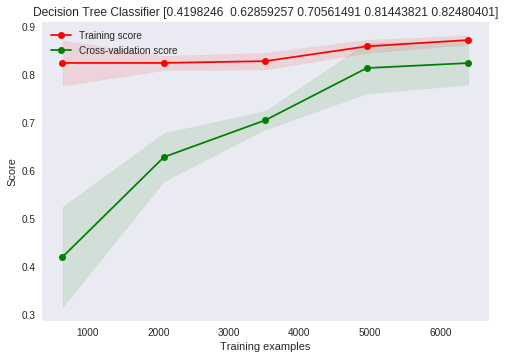

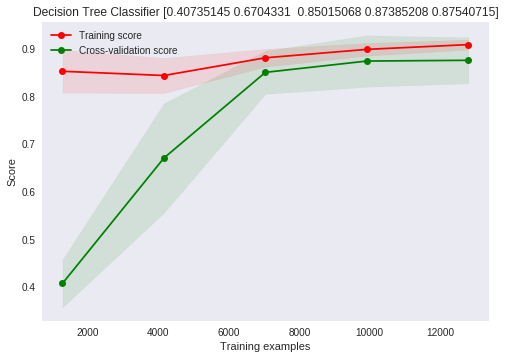

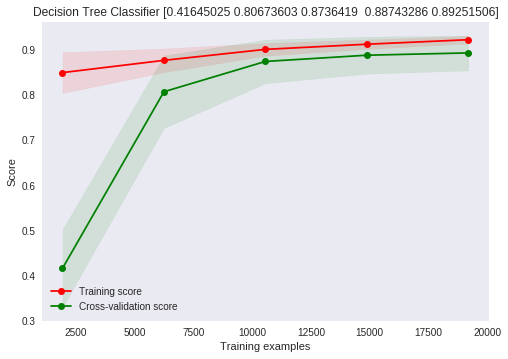

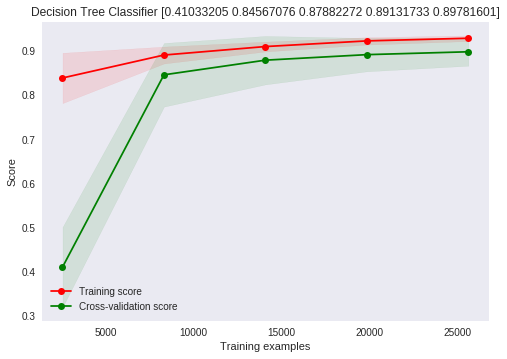

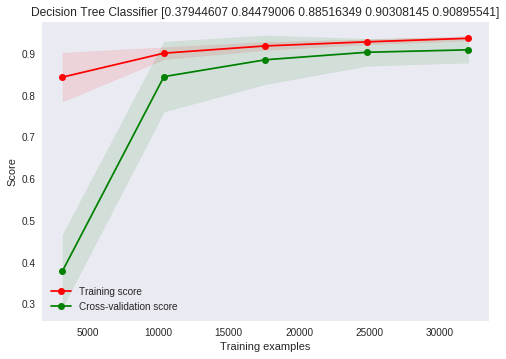

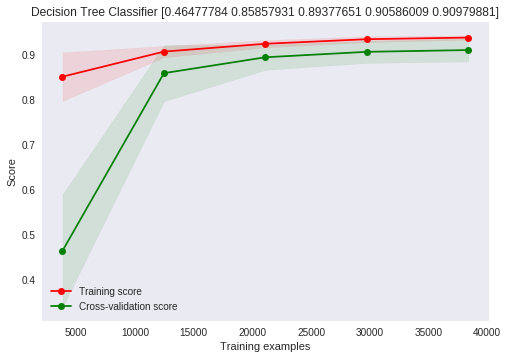

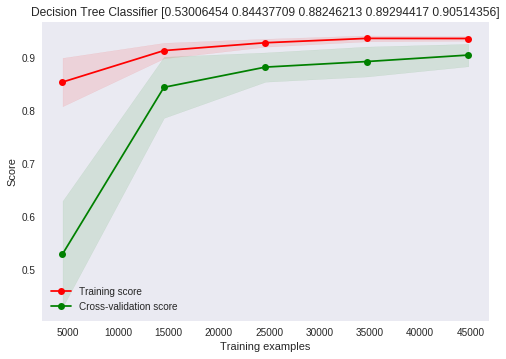

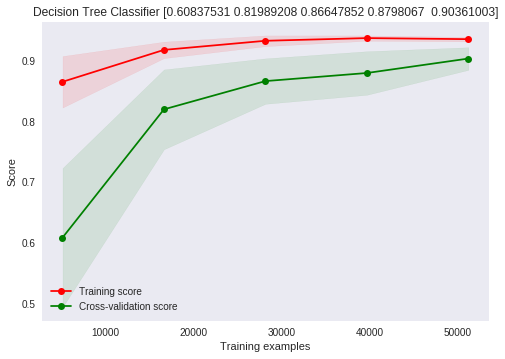

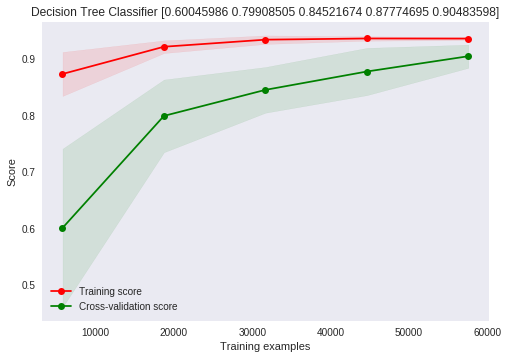

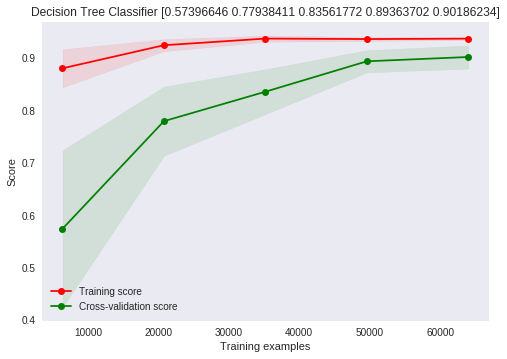

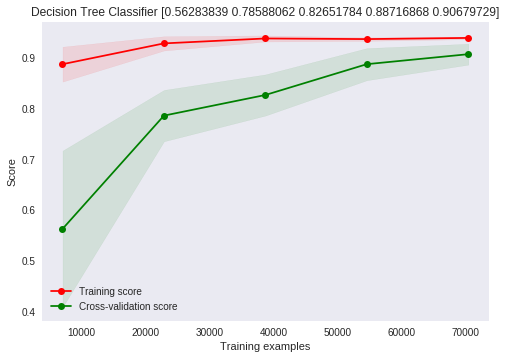

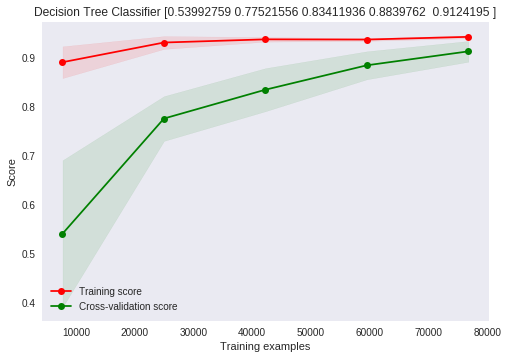

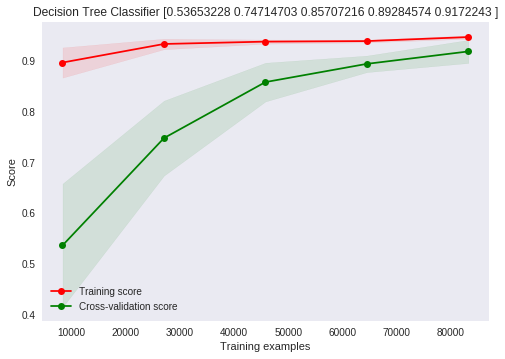

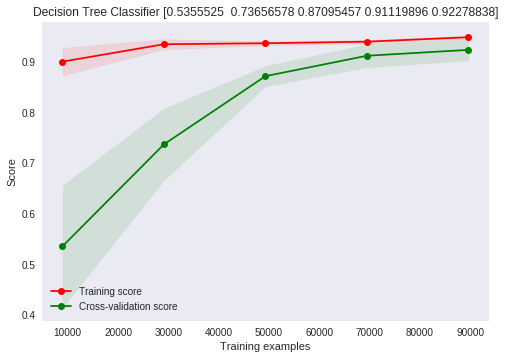

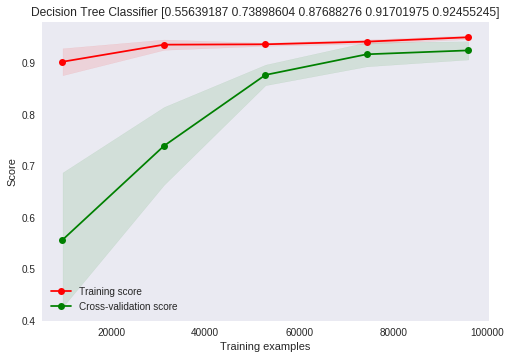

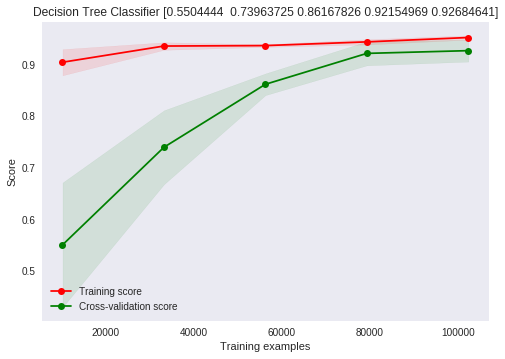

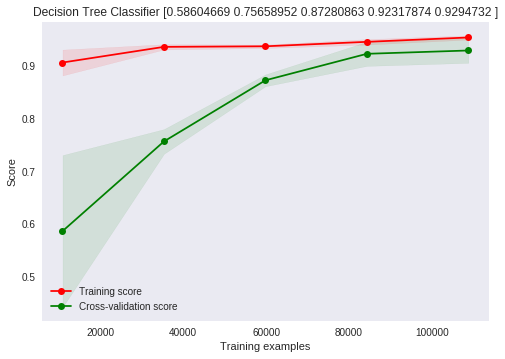

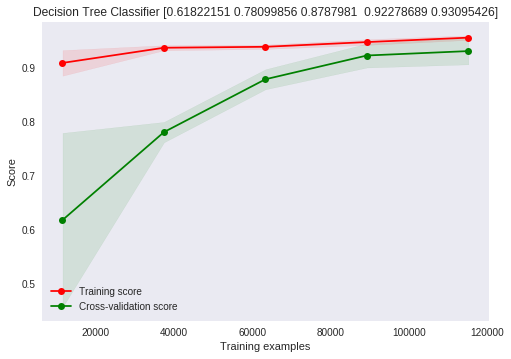

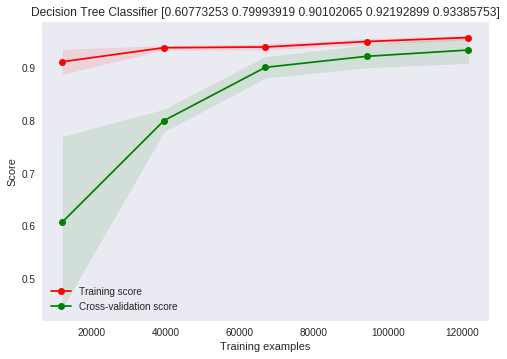

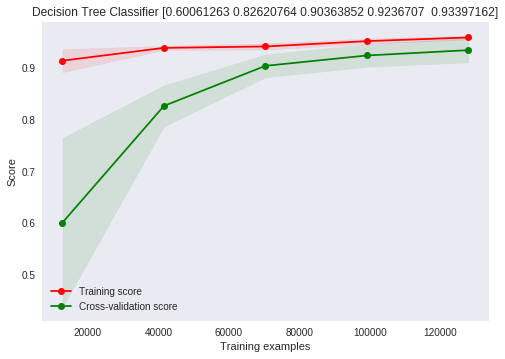

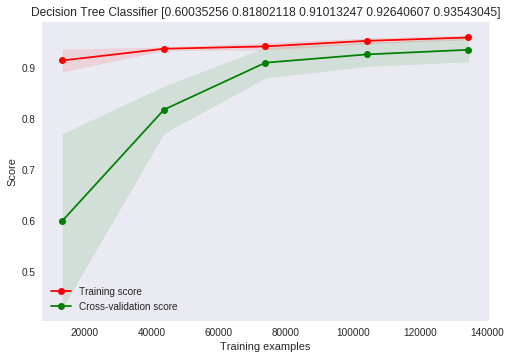

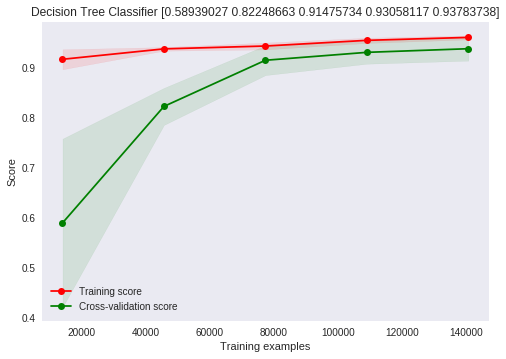

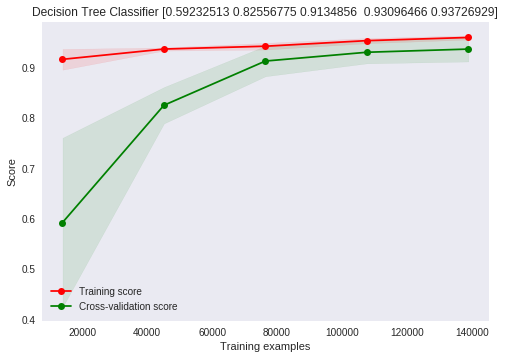

In [0]:
### Learning curve do split utilizando parametros otimos encontrados (min_samples_split = 44) ###
### para o modelo Decision tree###

%%time
#test_size_value = 0.2
highest_score_test = 0
split_slice_val = 8000
finish = False

for i in range(30):
  
  if(split_slice_val > 181690):
    split_slice_val = 181690 - 8000
    finish = True
  
  print(str(split_slice_val))
  X_train, X_test, y_train, y_test = train_test_split( X[0:split_slice_val], y[0:split_slice_val], test_size=0.2, random_state=42)
  
  dt = DecisionTreeClassifier(min_samples_split=44, random_state=99)
  dt.fit(X_train,y_train)

  score_train = dt.score(X_train, y_train)
  score_test = dt.score(X_test, y_test)
  
  plotCurve(DecisionTreeClassifier(min_samples_split=44, random_state=99),"Decision Tree Classifier",X,y,split_slice_val)

  split_slice_val += 8000
  if(finish) :
    break
  
print("\n" + str(now) + "\n")

In [0]:
### DECISION TREE PREDICTION TEST ###

%%time
real_value_txt = []
counter = 0
correct = 0 
arrayVal = []

for i in y:
  arrayVal.append(i)
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = dt.predict(df_predict)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict)) + ", total precision is : " + str(precision))
print("\n" + str(now) + "\n") 

174025 correct guesses out of 181691, total precision is : 95.78074863366925

2019-01-28 19:20:46.794961

CPU times: user 1.08 s, sys: 13 ms, total: 1.1 s
Wall time: 1.1 s


In [37]:
### DECISION TREE PRECISION-RECALL ###
y_pred = dt.predict(X_test)
y_score = dt.score(X_test,y_test)
mp_none = precision_score(y_pred,y_test,average = None)
mp_micro = precision_score(y_pred,y_test,average = 'micro')
mp_macro = precision_score(y_pred,y_test,average = 'macro')

print("Accuracy = " + str(y_score))
print("Macro average precision :" + str(mp_macro))
print("Micro average precision :" + str(mp_micro))
print("Per class precision : \n"  + str(mp_none))

pred_proba = dt.predict_proba(X_test)
print(pred_proba)
recal_score = recall_score(y_test,y_pred, average = 'micro')
print(recal_score)


Accuracy = 0.9529431189630975
Macro average precision :0.8964883471927032
Micro average precision :0.9529431189630975
Per class precision : 
[0.82 0.96 0.96 0.83 0.97 0.98 0.79 0.92 0.92 0.96 0.95 0.72]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.86 0.   0.  ]
 ...
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.33 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
0.9529431189630975


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9044482363979007
Specificity or true negative rate; TNR= 0.995859918588188
Precision or positive predictive value; PPV= 0.9098072245484815
Negative predictive value; NPV = 0.9958373130860583
Fall out or false positive rate; FPR= 0.004140081411811895
False negative rate; FNR=0.09555176360209942
False discovery rate; FDR= 0.09019277545151855
Overal accuracy; ACC= 0.9929679143894486



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9044482363979007
Specificity or true negative rate; TNR= 0.9913134760361729
Precision or positive predictive value; PPV= 0.9130912740340519
Negative predictive value; NPV = 0.9913909756931697
Fall out or false positive rate; FPR= 0.008686523963827221
False negative rate; FNR=0.09555176360209942
False discovery rate; FDR= 0.08690872596594823
Overal accuracy; ACC= 0.9840747060663168




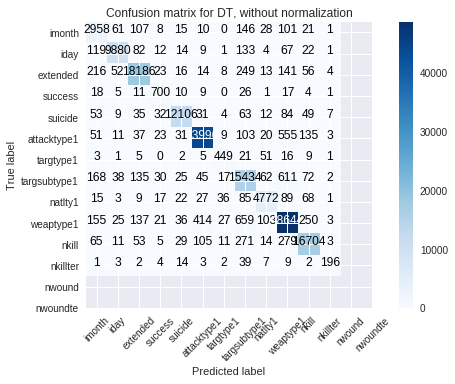

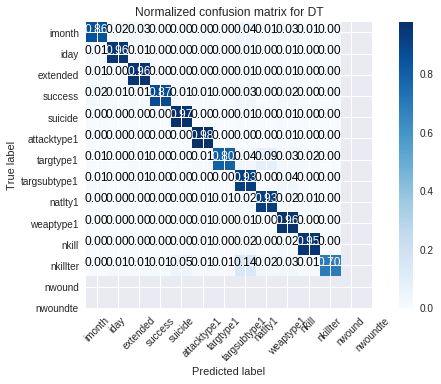


2019-01-28 19:20:46.794961

CPU times: user 2.49 s, sys: 1.08 s, total: 3.57 s
Wall time: 2.39 s


In [0]:
### DECISION TREE CONFUSION MATRIX ###
%%time
# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#RANDOM FOREST

In [0]:
## Using cross validation to find optimal hyper-parameter value for depth_val // RANDOM FOREST
%%time
depth_val = 14
score_result = []

for i in range (8):
  rf = RandomForestClassifier(max_depth=depth_val, random_state=0,n_estimators=100)
  scores = cross_val_score(rf,X_train,y_train,cv=5)
  print("Average value for "+ str(depth_val) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  depth_val +=4
  
print(score_result)
print("\n" + str(now) + "\n")


In [0]:
## Using cross validation to find optimal hyper-parameter value for n_estimators using max_depth = 34 // RANDOM FOREST
%%time
estimator = 100
score_result = []

for i in range (9):
  rf = RandomForestClassifier(max_depth=34, random_state=0,n_estimators=estimator)
  scores = cross_val_score(rf,X_train,y_train,cv=5)
  print("Average value for "+ str(estimator) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  estimator += 50
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 100 is : 0.8765211143519858
Average value for 150 is : 0.8752751458782845
Average value for 200 is : 0.8758255461591599
Average value for 250 is : 0.8772856879576827
Average value for 300 is : 0.8774002879732998
Average value for 350 is : 0.8774537790822656
Average value for 400 is : 0.8775836757555353
Average value for 450 is : 0.8778970907991794
Average value for 500 is : 0.878019450314565
[0.8765211143519858, 0.8752751458782845, 0.8758255461591599, 0.8772856879576827, 0.8774002879732998, 0.8774537790822656, 0.8775836757555353, 0.8778970907991794, 0.878019450314565]

2019-01-28 10:45:31.414028

CPU times: user 42min 16s, sys: 2min 12s, total: 44min 28s
Wall time: 44min 29s


In [42]:
### RANDOM FOREST ###
%%time

rf = RandomForestClassifier(max_depth=34, random_state=0,n_estimators=500)
rf.fit(X_train,y_train)

score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))
print("\n" + str(now) + "\n")

Score train: 0.9982341609589042
Score test: 0.887311153306365

2019-01-28 23:28:43.452647

CPU times: user 2min 22s, sys: 2.21 s, total: 2min 24s
Wall time: 2min 24s


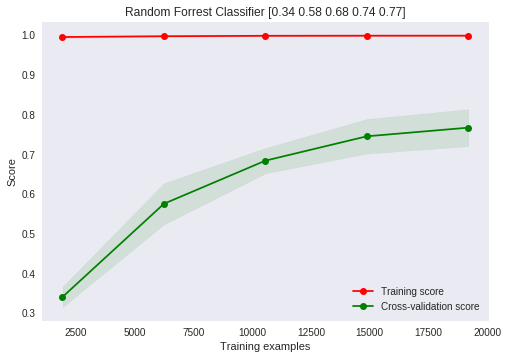

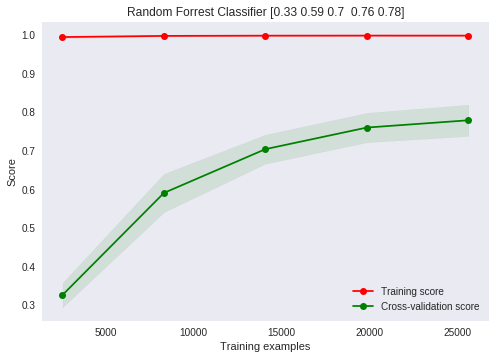

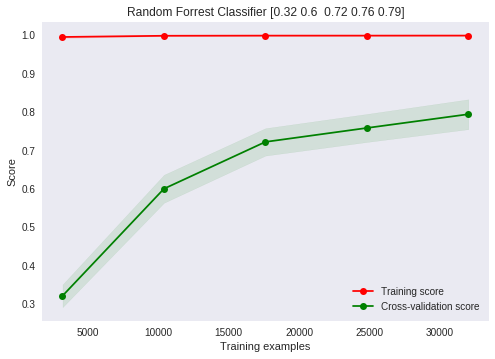

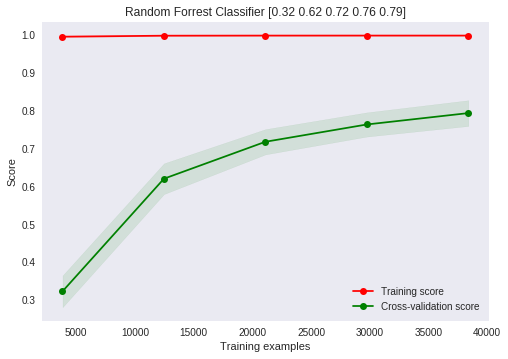

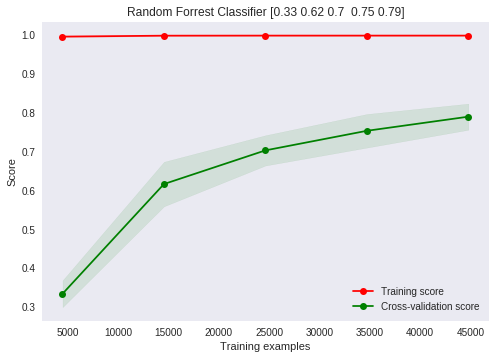

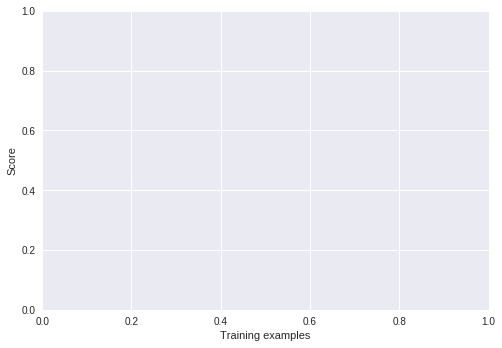

In [0]:
### Learning curve do split utilizando parametros otimos encontrados (max depth = 34 ; estimators = 500) ###
### para o modelo Random Forest###
%%time
#test_size_value = 0.2
highest_score_test = 0
split_slice_val = 8000
finish = False

for i in range(30):
  if(split_slice_val > 181690):
    split_slice_val = 181690
    finish = True
  
  print(split_slice_val)
  X_train, X_test, y_train, y_test = train_test_split( X[0:split_slice_val], y[0:split_slice_val], test_size=0.2, random_state=42)
    
  rf = RandomForestClassifier(max_depth=34, random_state=0,n_estimators=100)
  rf.fit(X_train,y_train)

  score_train = rf.score(X_train, y_train)
  score_test = rf.score(X_test, y_test)
  
 
  plotCurve(RandomForestClassifier(max_depth=34, random_state=0,n_estimators=500),"Random Forrest Classifier",X,y,split_slice_val)
  
  split_slice_val +=8000
  if(finish):
    break

print("\n" + str(now) + "\n")                            

In [0]:
### RANDOM FORREST PREDICTION TEST ###
%%time
real_value_txt = []
counter = 0
correct = 0
arrayVal = []

for i in y:
  arrayVal.append(i)
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = rf.predict(df_predict)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict)) + ", total precision is : " + str(precision))
print("\n" + str(now) + "\n")       

175647 correct guesses out of 181691, total precision is : 96.67347309442955

2019-01-28 19:20:46.794961

CPU times: user 38.2 s, sys: 93.7 ms, total: 38.3 s
Wall time: 38.3 s


In [44]:
### RANDOM FOREST PRECISION-RECALL ###
%%time
y_pred = rf.predict(X_test)
y_score = rf.score(X_test,y_test)
mp_none = precision_score(y_pred,y_test,average = None)
mp_micro = precision_score(y_pred,y_test,average = 'micro')
mp_macro = precision_score(y_pred,y_test,average = 'macro')

print("Accuracy = " + str(y_score))
print("Macro average precision :" + str(mp_macro))
print("Micro average precision :" + str(mp_micro))
print("Per class precision : \n"  + str(mp_none))

pred_proba = rf.predict_proba(X_test)
print(pred_proba)
recal_score = recall_score(y_test,y_pred, average = 'micro')
print(recal_score)
print("\n" + str(now) + "\n")   

Accuracy = 0.887311153306365
Macro average precision :0.6750932728364109
Micro average precision :0.887311153306365
Per class precision : 
[0.59 0.87 0.93 0.36 0.86 0.96 0.16 0.81 0.61 0.94 0.8  0.22]
[[0.   0.   0.   ... 0.02 0.   0.  ]
 [0.   0.01 0.87 ... 0.06 0.01 0.  ]
 [0.01 0.08 0.15 ... 0.19 0.13 0.  ]
 ...
 [0.   0.87 0.01 ... 0.02 0.05 0.  ]
 [0.17 0.   0.01 ... 0.34 0.08 0.  ]
 [0.   0.   0.01 ... 0.01 0.01 0.  ]]
0.887311153306365


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9069014046801507
Specificity or true negative rate; TNR= 0.9966181602988469
Precision or positive predictive value; PPV= 0.9667610019511135
Negative predictive value; NPV = 0.9968185726182868
Fall out or false positive rate; FPR= 0.0033818397011531934
False negative rate; FNR=0.09309859531984932
False discovery rate, FDR= 0.03323899804888678



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9069014046801507
Specificity or true negative rate; TNR= 0.9915364913345593
Precision or positive predictive value; PPV= 0.9187398372046118
Negative predictive value; NPV = 0.9916295654946979
Fall out or false positive rate; FPR= 0.008463508665440848
False negative rate; FNR=0.09309859531984932
False discovery rate, FDR= 0.08126016279538821




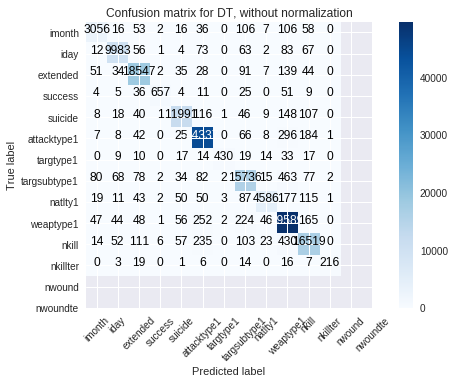

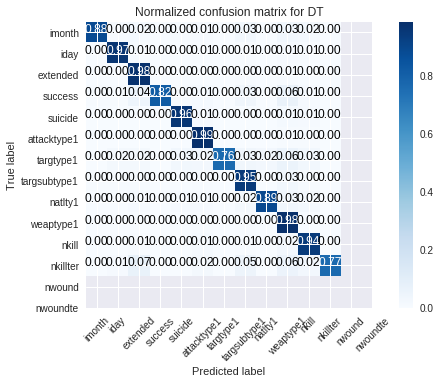


2019-01-28 19:20:46.794961

CPU times: user 2.53 s, sys: 1.07 s, total: 3.6 s
Wall time: 2.44 s


In [0]:
### RANDOM FOREST CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#MULTI-LAYER PERCEPTRON


In [0]:
## cross validation test to evaluate hidden_layer_sizes ##
%%time
score_result = []
hidden_layer1 = 1
hidden_layer2 = 1

for i in range(10):
  for j in range(10):
    
    mlp = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(hidden_layer1, hidden_layer2), random_state=1,max_iter = 150)
    scores = cross_val_score(mlp,X_train,y_train,cv=5)
    print("Average value for hidden layer sizes "+ str(hidden_layer1) + ", "+ str(hidden_layer2) + " is : "  + str(scores.mean()))
    score_result.append(scores.mean())
    hidden_layer2 +=1
    
  hidden_layer1 +=1
  hidden_layer2 = 1
  
print("\n" + str(now) + "\n")

Average value for hidden layer sizes 1, 1 is : 0.31162953821237804
Average value for hidden layer sizes 1, 2 is : 0.31217324331416973
Average value for hidden layer sizes 1, 3 is : 0.3372294386769069
Average value for hidden layer sizes 1, 4 is : 0.30338321252666334
Average value for hidden layer sizes 1, 5 is : 0.27745077596292134
Average value for hidden layer sizes 1, 6 is : 0.3940121537252811
Average value for hidden layer sizes 1, 7 is : 0.27745077596292134
Average value for hidden layer sizes 1, 8 is : 0.3364116144070996
Average value for hidden layer sizes 1, 9 is : 0.3473674318356964
Average value for hidden layer sizes 1, 10 is : 0.3904703283811364
Average value for hidden layer sizes 2, 1 is : 0.27745077596292134
Average value for hidden layer sizes 2, 2 is : 0.36048954747808626
Average value for hidden layer sizes 2, 3 is : 0.37270253732424485
Average value for hidden layer sizes 2, 4 is : 0.33729822760953204
Average value for hidden layer sizes 2, 5 is : 0.4444568775939601


In [0]:
## Using cross validation to find optimal hyper-parameter value for max_iter and alpha // MLP
%%time
iterations = 250
alpha_val = 1e-5
score_result = []

for i in range (15):
  for j in range (6):
    
    mlp = MLPClassifier(solver='adam', alpha=alpha_val,hidden_layer_sizes=(6, 10), random_state=1,max_iter = iterations)
    scores = cross_val_score(mlp,X_train,y_train,cv=5)
    print("Average value for "+ str(iterations) + " is : " + str(scores.mean()))
    score_result.append(scores.mean())
    alpha_val = alpha_val * 10
    
  iterations +=150
  alpha_val = 1e-5
  
print(score_result)
print("\n" + str(now) + "\n")

#Average value for 250 is : 0.6361190381684718
#Average value for 250 is : 0.6408446206499183
#Average value for 250 is : 0.6362767383423411
#Average value for 250 is : 0.640487346316492
#Average value for 250 is : 0.6340573664450143
#Average value for 250 is : 0.602979494916599
#Average value for 400 is : 0.46408274146218975
#Average value for 400 is : 0.31013447581549436
#Average value for 400 is : 0.26053576773220216
#Average value for 400 is : 0.2755555913659105

In [0]:
### MLP - Multi-layer Perceptron using optimal parameters found ###
%%time
mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
mlp.fit(X_train,y_train)

score_train = mlp.score(X_train, y_train)
score_test = mlp.score(X_test, y_test)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test))

print("\n" + str(now) + "\n")

Score train: 0.5686536815068494
Score test: 0.5700211893557885

2019-01-28 19:20:46.794961

CPU times: user 3min 55s, sys: 291 ms, total: 3min 55s
Wall time: 3min 55s


In [0]:
### Learning curve do split utilizando parametros otimos encontrados (iterations = 550 alpha = 10 hidden_layer_sizes = 6,10) ###
### para o modelo MLP ###
%%time
#test_size_value = 0.2
highest_score_test = 0
split_slice_val = 8000
finish = False

for i in range(30):
  if(split_slice_val > 181690):
    split_slice_val = 181690
    finish = True
  
  print(split_slice_val)
  X_train, X_test, y_train, y_test = train_test_split( X[0:split_slice_val], y[0:split_slice_val], test_size=0.2, random_state=42)
    
  mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
  mlp.fit(X_train,y_train)

  score_train = rf.score(X_train, y_train)
  score_test = rf.score(X_test, y_test)
  
  plotCurve(MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550),"MLP Classifier",X,y,split_slice_val)
  
  split_slice_val +=8000
  if(finish):
    break

print("\n" + str(now) + "\n")                              

In [0]:
### MLP PREDICTION TEST ###
%%time
real_value_txt = []
counter = 0
correct = 0
arrayVal = []

for i in y:
  arrayVal.append(i)
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = mlp.predict(df_predict)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict)) + ", total precision is : " + str(precision))
print("\n" + str(now) + "\n")      


103340 correct guesses out of 181691, total precision is : 56.87678531132527

2019-01-28 19:20:46.794961

CPU times: user 1.24 s, sys: 117 ms, total: 1.36 s
Wall time: 1.19 s


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.26082436209371795
Specificity or true negative rate; TNR= 0.9543616726330924
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9595036083479037
Fall out or false positive rate; FPR= 0.0456383273669076
False negative rate; FNR=0.739175637906282
False discovery rate, FDR= nan



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.2608243620937179
Specificity or true negative rate; TNR= 0.9328022147357925
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9359786228311955
Fall out or false positive rate; FPR= 0.06719778526420746
False negative rate; FNR=0.739175637906282
False discovery rate, FDR= nan




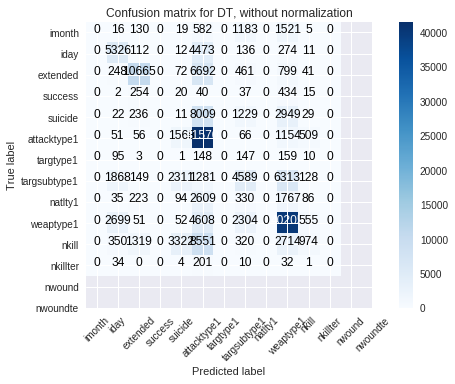

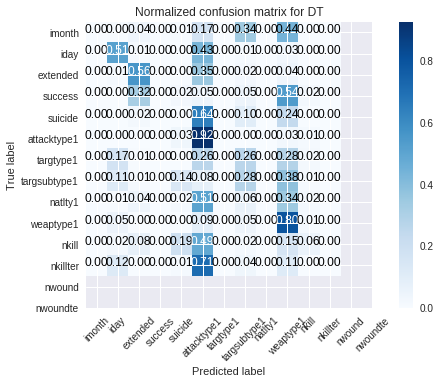


2019-01-28 19:20:46.794961

CPU times: user 2.34 s, sys: 1 s, total: 3.34 s
Wall time: 2.2 s
Parser   : 188 ms


In [0]:
### MLP CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#MATRIZ DE CORRELAÇÃO

In [0]:
df.corr()

,Unnamed: 0,eventid,imonth,iday,extended,region,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,nkill,nkillter,nwound,nwoundte
Unnamed: 0,1.000000,0.955971,0.034361,0.025062,0.092043,0.386987,-0.109257,0.134261,0.090415,0.079403,0.043323,-0.008359,0.010851,0.015216,0.048305,0.008508,0.043430
eventid,0.955971,1.000000,0.002706,0.018336,0.091761,0.401371,-0.082972,0.137743,0.074173,0.079080,0.048798,-0.019084,-0.011716,0.015351,0.027579,0.015282,0.027904
imonth,0.034361,0.002706,1.000000,0.005497,-0.000468,-0.002999,-0.002845,0.003071,0.006705,-0.000948,0.001508,-0.004838,0.007863,0.003463,0.003462,0.002938,0.005091
iday,0.025062,0.018336,0.005497,1.000000,-0.004700,0.009710,-0.011802,0.003593,-0.005333,-0.000052,-0.003184,0.003845,-0.003019,-0.003693,-0.002012,-0.001268,0.001812
extended,0.092043,0.091761,-0.000468,-0.004700,1.000000,0.038389,0.073233,-0.033961,0.272272,0.011613,0.022996,0.013609,0.207802,0.027737,0.005409,-0.006627,0.001592
region,0.386987,0.401371,-0.002999,0.009710,0.038389,1.000000,-0.030909,0.112672,0.007642,0.041396,0.030704,0.149821,0.013257,0.042062,0.026296,0.020472,-0.025643
success,-0.109257,-0.082972,-0.002845,-0.011802,0.073233,-0.030909,1.000000,-0.031155,0.048408,-0.059637,0.038192,-0.007157,-0.008178,0.053115,-0.019463,0.025804,-0.012840
suicide,0.134261,0.137743,0.003071,0.003593,-0.033961,0.112672,-0.031155,1.000000,-0.029962,-0.023440,-0.029521,-0.009207,-0.039928,0.136086,0.099133,0.099525,0.001780
attacktype1,0.090415,0.074173,0.006705,-0.005333,0.272272,0.007642,0.048408,-0.029962,1.000000,0.014513,0.022159,0.013769,0.658954,0.002475,0.036918,0.000846,0.029672
targtype1,0.079403,0.079080,-0.000948,-0.000052,0.011613,0.041396,-0.059637,-0.023440,0.014513,1.000000,0.982772,-0.034994,0.019846,0.008499,-0.038008,0.011303,-0.032612


#Features:

###imonth/iday:

  Consideramos esta feature possivelmente importante visto existirem acontecimentos influenciados diretamente por fatores temporais (feriados religiosos, eleiçoes, entre outros) dependendo do país.
 
 
###extended:
 
  Acreditamos que a duração do acontecimento poderá ser importante. Acontecimentos que durem mais que um dia de uma forma constante poderá significar melhor organização por parte terrorista ou maior dificuldade de contenção por parte das autoridades.
  
###success:
  
  Da mesma maneira que 'extended', poderá tambem significar melhor capacidade de organização por parte terrorista, ou falta de preparação pelas autoridades.
  
### suicide:
 
  Certos tipos de métodos de ataque levam ao suicidio do(s) atacante(s). Esta feature irá server de suporte á feature do tipo de ataque para suportar esta teoria, criando uma ligação entre o tipo de arma e o local de acontecimento.
  
### attacktype1:
 
  O método de ataque. Utilizado para criar uma ligação entre este e a região de acontecimento. Paises desenvolvidos iremos encontrar armamento balistico, enquanto medio oriente poderemos contar mais com elementos explosivos.
  
### targtype1/targsubtype1:
 
  O alvo do ataque. Acreditamos que diferentes regiões têm como algo diferentes elementos (civis, segurança publica, governo).
  
### weaptype1:
  
  A arma de ataque. Utilizado como suporte ao método de ataque, pois permite criar uma diferenciação entre tipo de armas ou explosivos utilizados.
  
### nkill/nwound:
 
  Mortos e feridos do lado atacado. Dependendo do objectivo do ataque, existiram mais mortos ou feridos, relacionando diretamente á mentalidade do pais de acontecimento.
  
### nkillter/nwoundter:
 
 Poderá demonstrar a preparação e capacidade de resposta a ataques terroristas, o qual poderá significar uma região mais desenvolvida.
 


#Encoding / One Hot Encoding

Todas as features que poderiam necessitar de qualquer tipo de encoding ja têm uma coluna diretamente relacionada, onde se encontram valores numericos a serem utilizados como identificadores para seus respectivos Strings.


#FINAL

Este dataset foi escolhido pois retrata um tópico bastante relevante na atualidade e devido a conter abundante informação sobre este.
De entre as várias possíveis escolhas para a *target* do modelo, foi escolhida a região onde ocorreu o ataque, esta target foi escolhido devido às várias possibilidades de análise de dados que provém da previsão da região onde ocorreu o ataque. Através desta previsão podemos criar correlações entre o número de mortes, o tipo de ataque, o objetivo do ataque e as regiões mais propícias a atentados terroristas. 

Conseguimos a criação de um modelo, *Decision Tree*,  com boa precisão de previsão em relação à target definida, fornecendo valores existentes no dataset.

A criação das estatísticas em relação a cada feature do dataset: média; moda; variância, histograma, permite-nos uma avaliação imediata dos dados em relação aos valores mais frequentes e à variância entre estes.


# USING ONE HOT ENCODED FEATURES
Vamos comparar a precisão dos modelos quando estes usam as features no seu estado default e quando nestas é aplicado one hot encoding.
Esta comparação permite-nos verificar se os modelos estão ou não a fazer previsões em base na semelhança/"proximidade" de valores

In [38]:
### Criação de uma novo dataset, df_ohc, onde as colunas 'attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','weaptype1_txt'###
### irão ser alvo de one hot encoding ###
%%time

df_ohc = df.loc[0:,['region','imonth','iday','extended','success','suicide','nkill','nkillter','nwound','nwoundte','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','weaptype1_txt']]


df_ohc = pd.concat([df_ohc,pd.get_dummies(df_ohc['attacktype1_txt'],prefix = 'attacktype1')],axis = 1)
df_ohc = pd.concat([df_ohc,pd.get_dummies(df_ohc['targtype1_txt'],prefix = 'targtype1')],axis = 1)
df_ohc = pd.concat([df_ohc,pd.get_dummies(df_ohc['targsubtype1_txt'],prefix ='targsubtype1')],axis = 1)
df_ohc = pd.concat([df_ohc,pd.get_dummies(df_ohc['natlty1_txt'],prefix = 'natlty1')],axis = 1)
df_ohc = pd.concat([df_ohc,pd.get_dummies(df_ohc['weaptype1_txt'],prefix = 'weaptype1')],axis = 1)


df_ohc.drop(['attacktype1_txt'],axis = 1,inplace = True)
df_ohc.drop(['targtype1_txt'],axis = 1,inplace = True)
df_ohc.drop(['targsubtype1_txt'],axis = 1,inplace = True)
df_ohc.drop(['natlty1_txt'] ,axis = 1,inplace = True)
df_ohc.drop(['weaptype1_txt'],axis = 1,inplace = True)



CPU times: user 880 ms, sys: 85 ms, total: 965 ms
Wall time: 967 ms


In [39]:
### DATA PREPARATION ###
%%time
targets = df['region'].unique()

features_ohc = list(df_ohc.columns[1:])
df_ohc.replace([np.inf, -np.inf], np.nan)


# "mini-modelo" que subsitui valores infinitos e NaNs pelo valor mais comum de modo a permitir a aplicaçao do modelo de classificação 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

y_ohc = df['region']
X_ohc = df_ohc[features_ohc]

imp_mean.fit(X_ohc,y_ohc)
X_ohc = imp_mean.transform(X_ohc)
df_predict_ohc = pd.DataFrame(X_ohc.reshape(-1,379),columns = df_ohc.columns[1:])


# divisao train / test
X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split( X_ohc, y_ohc, test_size=0.2, random_state=42)

# divisao train / validation
X_train_ohc, X_val_ohc, y_train_ohc, y_val_ohc = train_test_split( X_train_ohc, y_train_ohc, test_size=0.1, random_state=42)
print("\n" + str(now) + "\n")


2019-01-28 23:28:43.452647

CPU times: user 19.1 s, sys: 1.72 s, total: 20.8 s
Wall time: 20.8 s


# DECISION TREE OHC

In [0]:
## Using cross validation to find optimal hyper-parameter value for min_samples_split // DECISION TREE
%%time
sample_split = 20
score_result = []
highest_score_test = 0

for i in range (15):
  dt = DecisionTreeClassifier(min_samples_split=sample_split, random_state=99)
  scores = cross_val_score(dt,X_train_ohc,y_train_ohc,cv=5)
  print("Average value for "+ str(sample_split) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  
  if(scores.mean() > highest_score_test):
    highest_score_test = scores.mean()
    print(str(sample_split) + " Is the new best tree split with score test: " + str(highest_score_test)+"\n")
    
  sample_split +=4
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 20 is : 0.9532627053931968
20 Is the new best tree split with score test: 0.9532627053931968

Average value for 24 is : 0.953706048662523
24 Is the new best tree split with score test: 0.953706048662523

Average value for 28 is : 0.9537901395112677
28 Is the new best tree split with score test: 0.9537901395112677

Average value for 32 is : 0.9538054341194739
32 Is the new best tree split with score test: 0.9538054341194739

Average value for 36 is : 0.9541570988393048
36 Is the new best tree split with score test: 0.9541570988393048

Average value for 40 is : 0.954340543297602
40 Is the new best tree split with score test: 0.954340543297602

Average value for 44 is : 0.9543558338183729
44 Is the new best tree split with score test: 0.9543558338183729

Average value for 48 is : 0.9543481967398705
Average value for 52 is : 0.9545011130401713
52 Is the new best tree split with score test: 0.9545011130401713

Average value for 56 is : 0.9544475783986324
Average value for 

In [40]:
### DECISION TREE ###
%%time
dt = DecisionTreeClassifier(min_samples_split=76, random_state=99)
dt.fit(X_train_ohc, y_train_ohc)

score_train_ohc = dt.score(X_train_ohc, y_train_ohc)
score_test_ohc = dt.score(X_test_ohc, y_test_ohc)

print("Score train: " + str(score_train_ohc))
print("Score test: " + str(score_test_ohc))
print("\n" + str(now) + "\n")

Score train: 0.9628332925636007
Score test: 0.957428657915738

2019-01-28 23:28:43.452647

CPU times: user 44.4 s, sys: 24.7 ms, total: 44.4 s
Wall time: 44.4 s


In [0]:
### Learning curve do split utilizando parametros otimos encontrados (min_samples_split = 76) ###
### para o modelo Decision tree###

%%time
highest_score_test = 0
split_slice_val = 8000
finish = False

for i in range(30):
  
  if(split_slice_val > 181690):
    split_slice_val = 181690 - 8000
    finish = True
  
  print(str(split_slice_val))
  X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split( X_ohc[0:split_slice_val], y_ohc[0:split_slice_val], test_size=0.2, random_state=42)
  
  dt = DecisionTreeClassifier(min_samples_split=76, random_state=99)
  dt.fit(X_train_ohc,y_train_ohc)

  score_train = dt.score(X_train_ohc, y_train_ohc)
  score_test = dt.score(X_test_ohc, y_test_ohc)
  
  plotCurve(DecisionTreeClassifier(min_samples_split=44, random_state=99),"Decision Tree Classifier",X_ohc,y_ohc,split_slice_val)

  split_slice_val += 8000
  if(finish) :
    break
  
print("\n" + str(now) + "\n")

In [0]:
### DECISION TREE PREDICTION TEST ###

%%time
real_value_txt = []
counter = 0
correct = 0 
arrayVal = []

for i in y_ohc:
  arrayVal.append(i)
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = dt.predict(df_predict_ohc)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict_ohc)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict_ohc)) + ", total precision is : " + str(precision))
print("\n")  

174635 correct guesses out of 181691, total precision is : 96.11648348019439


CPU times: user 1.37 s, sys: 4.98 ms, total: 1.37 s
Wall time: 1.37 s


In [41]:
### DECISION TREE OHC PRECISION-RECALL ###

y_pred = dt.predict(X_test_ohc)
y_score = dt.score(X_test_ohc,y_test_ohc)
mp_none = precision_score(y_pred,y_test_ohc,average = None)
mp_micro = precision_score(y_pred,y_test_ohc,average = 'micro')
mp_macro = precision_score(y_pred,y_test_ohc,average = 'macro')

print("Accuracy = " + str(y_score))
print("Macro average precision :" + str(mp_macro))
print("Micro average precision :" + str(mp_micro))
print("Per class precision : \n"  + str(mp_none))

pred_proba = dt.predict_proba(X_test_ohc)
print(pred_proba)
recal_score = recall_score(y_test_ohc,y_pred, average = 'micro')
print(recal_score)

Accuracy = 0.957428657915738
Macro average precision :0.9050643834000941
Micro average precision :0.957428657915738
Per class precision : 
[0.85 0.95 0.95 0.82 0.97 0.98 0.82 0.92 0.92 0.96 0.95 0.77]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.02 0.02 0.09 ... 0.34 0.05 0.  ]
 ...
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.07 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
0.957428657915738


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9089696346465012
Specificity or true negative rate; TNR= 0.9962188076205516
Precision or positive predictive value; PPV= 0.9194756907378833
Negative predictive value; NPV = 0.9961986773050743
Fall out or false positive rate; FPR= 0.0037811923794483448
False negative rate; FNR=0.09103036535349884
False discovery rate, FDR= 0.08052430926211664



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.9089696346465012
Specificity or true negative rate; TNR= 0.991724512240591
Precision or positive predictive value; PPV= 0.9185645362872515
Negative predictive value; NPV = 0.991791976328487
Fall out or false positive rate; FPR= 0.008275487759408987
False negative rate; FNR=0.0910303653534988
False discovery rate, FDR= 0.08143546371274842




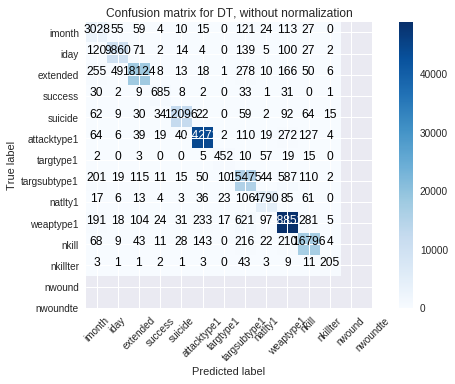

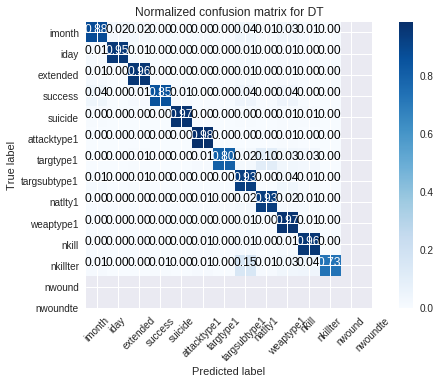


2019-01-28 19:20:46.794961

CPU times: user 2.48 s, sys: 1.01 s, total: 3.5 s
Wall time: 2.36 s


In [0]:
### DECISION TREE CONFUSION MATRIX ###
%%time
# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#RANDOM FOREST OHC

In [0]:
## Using cross validation to find optimal hyper-parameter value for depth_val // RANDOM FOREST
%%time
depth_val = 14
score_result = []

for i in range (8):
  rf = RandomForestClassifier(max_depth=depth_val, random_state=0,n_estimators=100)
  scores = cross_val_score(rf,X_train_ohc,y_train_ohc,cv=5)
  print("Average value for "+ str(depth_val) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  depth_val +=4
  
print(score_result)
print("\n" + str(now) + "\n")


Average value for 14 is : 0.8571274286737516
Average value for 18 is : 0.8797698528365705
Average value for 22 is : 0.8994311003905866
Average value for 26 is : 0.9116544081442651
Average value for 30 is : 0.920430182826081
Average value for 34 is : 0.9275241063859984
Average value for 38 is : 0.932301995619887
Average value for 42 is : 0.9369802022690277
[0.8571274286737516, 0.8797698528365705, 0.8994311003905866, 0.9116544081442651, 0.920430182826081, 0.9275241063859984, 0.932301995619887, 0.9369802022690277]

2019-01-28 15:15:43.109175

CPU times: user 39min 50s, sys: 3.49 s, total: 39min 54s
Wall time: 39min 54s


In [0]:
## Using cross validation to find optimal hyper-parameter value for n_estimators using max_depth = 42 // RANDOM FOREST
%%time
estimator = 100
score_result = []

for i in range (4):
  rf = RandomForestClassifier(max_depth=42, random_state=0,n_estimators=estimator)
  scores = cross_val_score(rf,X_train_ohc,y_train_ohc,cv=5)
  print("Average value for "+ str(estimator) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  estimator += 100
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 100 is : 0.9369802022690277
Average value for 200 is : 0.9367355238523066
Average value for 300 is : 0.9371254624947662
Average value for 400 is : 0.9369726122267259
[0.9369802022690277, 0.9367355238523066, 0.9371254624947662, 0.9369726122267259]

2019-01-28 15:15:43.109175

CPU times: user 59min 31s, sys: 14.2 s, total: 59min 45s
Wall time: 59min 46s


In [0]:
### RANDOM FOREST ###
%%time

rf = RandomForestClassifier(max_depth=42, random_state=0,n_estimators=300)
rf.fit(X_train_ohc,y_train_ohc)

score_train_ohc = rf.score(X_train_ohc, y_train_ohc)
score_test_ohc = rf.score(X_test_ohc, y_test_ohc)

print("Score train: " + str(score_train_ohc))
print("Score test: " + str(score_test_ohc))
print("\n" + str(now) + "\n")

Score train: 0.9657992906066536
Score test: 0.9402019868460882

2019-01-28 19:20:46.794961

CPU times: user 5min 56s, sys: 3.16 s, total: 5min 59s
Wall time: 5min 59s


In [0]:
### RANDOM FORREST PREDICTION TEST ###
%%time
real_value_txt = []
counter = 0
correct = 0
arrayVal = []

for i in y_ohc:
  arrayVal = []
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = rf.predict(df_predict_ohc)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict_ohc)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict_ohc)) + ", total precision is : " + str(precision))
print("\n" + str(now) + "\n")       

174114 correct guesses out of 181691, total precision is : 95.82973289816226

2019-01-28 19:20:46.794961

CPU times: user 29.7 s, sys: 171 ms, total: 29.8 s
Wall time: 29.8 s


In [0]:
### RANDOM FORREST  PRECISION RECALL ###

y_pred = rf.predict(X_test_ohc)
y_score = rf.score(X_test_ohc,y_test_ohc)
mp_none = precision_score(y_pred,y_test_ohc,average = None)
mp_micro = precision_score(y_pred,y_test_ohc,average = 'micro')
mp_macro = precision_score(y_pred,y_test_ohc,average = 'macro')

print("Accuracy = " + str(y_score))
print("Macro average precision :" + str(mp_macro))
print("Micro average precision :" + str(mp_micro))
print("Per class precision : \n"  + str(mp_none))

pred_proba = dt.predict_proba(X_test_ohc)
print(pred_proba)
recal_score = recall_score(y_test_ohc,y_pred, average = 'micro')
print(recal_score)

Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.7897761618239242
Specificity or true negative rate; TNR= 0.9955637897616824
Precision or positive predictive value; PPV= 0.9665764129616771
Negative predictive value; NPV = 0.9961402614254173
Fall out or false positive rate; FPR= 0.00443621023831772
False negative rate; FNR=0.21022383817607593
False discovery rate, FDR= 0.033423587038323065



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.7897761618239242
Specificity or true negative rate; TNR= 0.9808887419839931
Precision or positive predictive value; PPV= 0.8868124943675991
Negative predictive value; NPV = 0.9817394537696432
Fall out or false positive rate; FPR= 0.019111258016006903
False negative rate; FNR=0.2102238381760759
False discovery rate, FDR= 0.11318750563240092




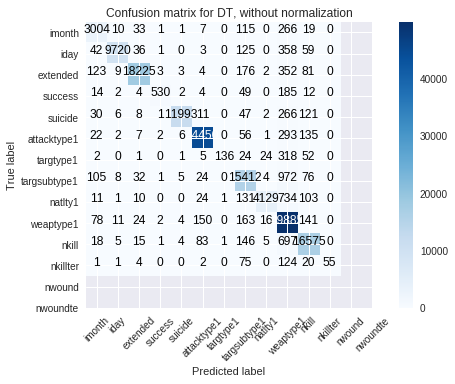

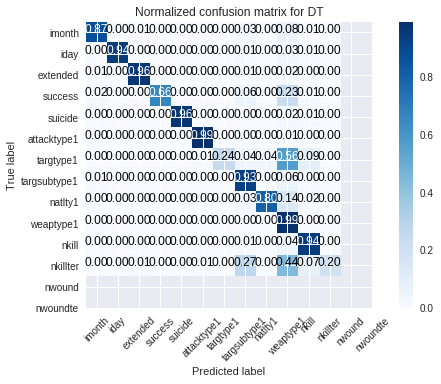


2019-01-28 19:20:46.794961

CPU times: user 2.57 s, sys: 1.03 s, total: 3.6 s
Wall time: 2.42 s


In [0]:
### RANDOM FOREST CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#MLP OHC

In [0]:
### MLP - Multi-layer Perceptron using optimal parameters found ###
%%time
mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
mlp.fit(X_train_ohc,y_train_ohc)

score_train_ohc = mlp.score(X_train_ohc, y_train_ohc)
score_test_ohc = mlp.score(X_test_ohc, y_test_ohc)

print("Score train: " + str(score_train_ohc))
print("Score test: " + str(score_test_ohc))

print("\n" + str(now) + "\n")

Score train: 0.5686307485322897
Score test: 0.5735160571287047

2019-01-28 22:56:50.536568

CPU times: user 1min 28s, sys: 37.1 s, total: 2min 5s
Wall time: 1min 4s


In [0]:
### Learning curve do split utilizando parametros otimos encontrados (iterations = 550 alpha = 10 hidden_layer_sizes = 6,10) ###
### para o modelo MLP ###
%%time
#test_size_value = 0.2
highest_score_test = 0
split_slice_val = 8000
finish = False

for i in range(30):
  if(split_slice_val > 181690):
    split_slice_val = 181690
    finish = True
  
  print(split_slice_val)
  X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split( X_ohc[0:split_slice_val], y_ohc[0:split_slice_val], test_size=0.2, random_state=42)
    
  mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
  mlp.fit(X_train_ohc,y_train_ohc)

  score_train = rf.score(X_train_ohc, y_train_ohc)
  score_test = rf.score(X_test_ohc, y_test_ohc)
  
   plotCurve(DecisionTreeClassifier(min_samples_split=44, random_state=99),"Decision Tree Classifier",X_ohc,y_ohc,split_slice_val)
  plotCurve(MLPClassifier(),"MLP Classifier",0.2,X_ohc,y_ohc,split_slice_val)
  
  split_slice_val +=8000
  if(finish):
    break

print("\n" + str(now) + "\n")                             

In [0]:
### MLP PREDICTION TEST ###
%%time
real_value_txt = []
counter = 0
correct = 0
arrayVal = []

for i in y:
  arrayVal.append(i)
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = mlp.predict(df_predict_ohc)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict_ohc)) * 100
print(str(correct) + " correct guesses out of "+ str(len(df_predict)) + ", total precision is : " + str(precision))
print("\n")        


103485 correct guesses out of 181691, total precision is : 56.95659113549928


CPU times: user 1.82 s, sys: 151 ms, total: 1.97 s
Wall time: 1.51 s


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.2069755561441493
Specificity or true negative rate; TNR= 0.9526703426106274
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9628282771370417
Fall out or false positive rate; FPR= 0.04732965738937248
False negative rate; FNR=0.7930244438558507
False discovery rate; FDR= nan
Overal accuracy; ACC= 0.928260985225832



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.2069755561441493
Specificity or true negative rate; TNR= 0.9279068687403772
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9328570943095308
Fall out or false positive rate; FPR= 0.07209313125962279
False negative rate; FNR=0.7930244438558507
False discovery rate; FDR= nan
Overal accuracy; ACC= 0.8678292593573581




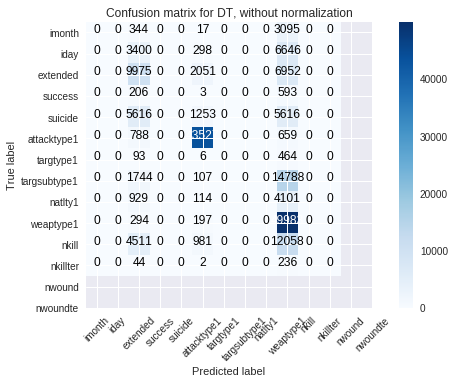

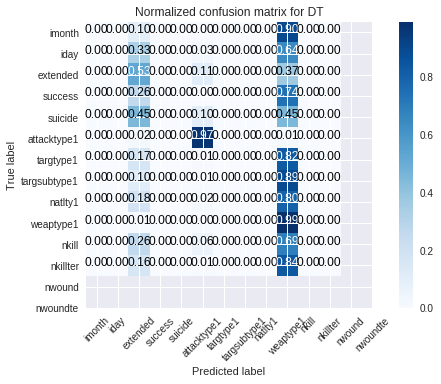


2019-01-28 22:56:50.536568

CPU times: user 2.75 s, sys: 1.07 s, total: 3.82 s
Wall time: 2.71 s


In [0]:
### MLP CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(arrayVal, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

# BALANCEAMENTO DE DADOS

De modo a eliminar a possibilidade de overfitting vamos avaliar a precisão dos modelos num ambiente de test controlado onde iremos ter um número idêntico de entries para cada região

Regiões existentes:
- North America ('region' = 1)
- Central America & Caribbean ('region' = 2)
- South America ('region' = 3)
- East Asia ('region' = 4)
- Southeast Asia ('region' = 5)
- South Asia ('region' = 6)
- Central Asia ('region' = 7)
- Western Europe ('region' = 8)
- Eastern Europe ('region' = 9)
- Middle East & North Africa ('region' = 10)
- Sub-Saharan Africa ('region' = 11)
- Australasia & Oceania ('region' = 12)

#Teste de entries
Avaliar a quantidade de entires por região e escolher o menor valor encontrado para o balanceamento de dados

In [0]:
regionCounter = df['region'].tolist()
region_dict = {}

for i in (regionCounter):
  if i not in region_dict:
    region_dict[i] = 1
  else:
    region_dict[i] += 1

print(region_dict)    
print("\n" + str(now) + "\n")

{2: 10344, 1: 3456, 5: 12485, 8: 16639, 4: 802, 3: 18978, 9: 5144, 11: 17550, 10: 50474, 12: 282, 6: 44974, 7: 563}

2019-01-28 22:56:50.536568



# Teste de entries (conclusão)
Valor mais pequeno encontrado para quantidade de entries de uma região é 282 para "Australasia & Oceania" ('region' = 12)
Teste de precisão será então feito com 282 entries por região

In [0]:
### DATA PREPARATION ###

df_balanced = df.loc[0:,['region','imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
df_predict_balanced = pd.DataFrame(columns =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte'])

features_balanced = list(df_balanced.columns[1:])
df_balanced.replace([np.inf, -np.inf], np.nan)

y_balanced = df_balanced['region']
X_balanced = df_balanced[features_balanced]

# "mini-modelo" que subsitui valores infinitos e NaNs pelo valor mais comum de modo a permitir a aplicaçao do modelo de classificação 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(X_balanced,y_balanced)
X_balanced = imp_mean.transform(X_balanced)
df_balanced_nan = pd.DataFrame(X_balanced.reshape(-1,14),columns = ['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte'])

if(np.any(np.isnan(X_balanced)) == False and np.all(np.isfinite(X_balanced)) == True):
  print("All invalid values removed")
  
if(np.any(np.isnan(df_balanced)) == False and np.all(np.isfinite(df_balanced)) == True):
  print("All invalid values removed")
  
# divisao train / test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split( X_balanced, y_balanced, test_size=0.2, random_state=42)
print("\n" + str(now) + "\n")

All invalid values removed

2019-01-28 22:56:50.536568



In [0]:
### Criação de dataframe, df_predict_balanced, que contém os valores a avaliar no predict ###
### Criação de realValueArray que contém os valores reais da região correspondentes a cada linha de df_predict_balanced ###
entry_dict = {}
testPredictArray = []
realValueArray = []
counter = 0
i = 0 

for i in (regionCounter):
  if i not in entry_dict:
    entry_dict[i] = 1   
    entry_val = df_balanced_nan.loc[counter:counter,['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
    df_predict_balanced = df_predict_balanced.append(entry_val.loc[counter],ignore_index=True) 
    realValueArray.append(df_balanced.loc[counter:counter,['region']].region.item())
    
  else:
    if entry_dict[i] < 282:
      entry_dict[i] += 1
      entry_val = df_balanced_nan.loc[counter:counter,['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
      df_predict_balanced = df_predict_balanced.append(entry_val.loc[counter],ignore_index=True)
      realValueArray.append(df_balanced.loc[counter:counter,['region']].region.item())
  counter += 1
print("\n" + str(now) + "\n")


2019-01-28 22:56:50.536568



#DECISION TREE - BALANCED

In [0]:
## cross validation to find optimal min_samples_split for decision tree with new dataset ##
%%time
sample_split = 20
score_result = []
highest_score_test = 0

for i in range (15):
  dt = DecisionTreeClassifier(min_samples_split=sample_split, random_state=99)
  scores = cross_val_score(dt,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(sample_split) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  
  if(scores.mean() > highest_score_test):
    highest_score_test = scores.mean()
    print(str(sample_split) + " Is the new best tree split with score test: " + str(highest_score_test)+"\n")
    
  sample_split +=4
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 20 is : 0.950396233242901
20 Is the new best tree split with score test: 0.950396233242901

Average value for 24 is : 0.9508984943202128
24 Is the new best tree split with score test: 0.9508984943202128

Average value for 28 is : 0.9514076192468975
28 Is the new best tree split with score test: 0.9514076192468975

Average value for 32 is : 0.9514351423402572
32 Is the new best tree split with score test: 0.9514351423402572

Average value for 36 is : 0.9516346763645703
36 Is the new best tree split with score test: 0.9516346763645703

Average value for 40 is : 0.9515727663245059
Average value for 44 is : 0.9513113459282525
Average value for 48 is : 0.9514076590057906
Average value for 52 is : 0.9513457177316431
Average value for 56 is : 0.9515177031062716
Average value for 60 is : 0.9514007345742387
Average value for 64 is : 0.9514076041047554
Average value for 68 is : 0.9511461709252597
Average value for 72 is : 0.9509397744697269
Average value for 76 is : 0.950740237

In [0]:
### DECISION TREE ###
%%time
dt = DecisionTreeClassifier(min_samples_split=36, random_state=99)
dt.fit(X_train_balanced, y_train_balanced)

score_train = dt.score(X_train_balanced, y_train_balanced)
score_test = dt.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test) + "\n")


Score train: 0.9619819472728274
Score test: 0.9527780070998101

CPU times: user 1.01 s, sys: 1.85 ms, total: 1.01 s
Wall time: 1.01 s


In [0]:
## DECISION TREE prediction test ##
%%time
real_value_txt = []
counter = 0
correct = 0 

for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = dt.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
        #print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 3384, total precision is : " + str(precision))
print("\n")  

2792 correct guesses out of 3384, total precision is : 82.50591016548464


CPU times: user 364 ms, sys: 0 ns, total: 364 ms
Wall time: 368 ms


In [0]:
### DECISION TREE CONFUSION MATRIX ###
%%time
# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#RANDOM FOREST - BALANCED

In [0]:
## cross validation to find optimal depth_val for random forest with new dataset ##
%%time
depth_val = 14
score_result = []

for i in range (8):
  rf = RandomForestClassifier(max_depth=depth_val, random_state=0,n_estimators=100)
  scores = cross_val_score(rf,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(depth_val) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  depth_val +=4
  
print(score_result)
print("\n" + str(now) + "\n")


Average value for 14 is : 0.7945882773836332
Average value for 18 is : 0.8455404437819973
Average value for 22 is : 0.8698401602604833
Average value for 26 is : 0.8775247763362373
Average value for 30 is : 0.8780478419402714
Average value for 34 is : 0.8788869552700833
Average value for 38 is : 0.8789901497062418
Average value for 42 is : 0.8788318925103054
[0.7945882773836332, 0.8455404437819973, 0.8698401602604833, 0.8775247763362373, 0.8780478419402714, 0.8788869552700833, 0.8789901497062418, 0.8788318925103054]

2019-01-28 10:45:31.414028

CPU times: user 13min 6s, sys: 21.6 s, total: 13min 28s
Wall time: 13min 28s


In [0]:
## cross validation to find optimal depth_val for random forest with new dataset - continuation##
%%time
depth_val = 42
score_result = []

for i in range (8):
  rf = RandomForestClassifier(max_depth=depth_val, random_state=0,n_estimators=100)
  scores = cross_val_score(rf,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(depth_val) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  depth_val +=4
  
print(score_result)
print("\n" + str(now) + "\n")


Average value for 42 is : 0.8788318925103054
Average value for 46 is : 0.8781578353930056
Average value for 50 is : 0.8780546073393778
Average value for 54 is : 0.8779169989720075
Average value for 58 is : 0.8779169989720075
Average value for 62 is : 0.8779169989720075
Average value for 66 is : 0.8779169989720075
Average value for 70 is : 0.8779169989720075
[0.8788318925103054, 0.8781578353930056, 0.8780546073393778, 0.8779169989720075, 0.8779169989720075, 0.8779169989720075, 0.8779169989720075, 0.8779169989720075]

2019-01-28 10:45:31.414028

CPU times: user 14min 4s, sys: 12.6 s, total: 14min 17s
Wall time: 14min 17s


In [0]:
## Using cross validation to find optimal hyper-parameter value for n_estiamtors using max_depth = 38 // RANDOM FOREST
%%time
estimator = 100
score_result = []

for i in range (9):
  rf = RandomForestClassifier(max_depth=38, random_state=0,n_estimators=estimator)
  scores = cross_val_score(rf,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(estimator) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  estimator += 50
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 100 is : 0.8789901497062418
Average value for 150 is : 0.8788319748704536
Average value for 200 is : 0.8787906989775495
Average value for 250 is : 0.8792860223554966
Average value for 300 is : 0.87904529717198
Average value for 350 is : 0.8795544140441628
Average value for 400 is : 0.8793824121055266
Average value for 450 is : 0.8791691333361695
Average value for 500 is : 0.87956131718479
[0.8789901497062418, 0.8788319748704536, 0.8787906989775495, 0.8792860223554966, 0.87904529717198, 0.8795544140441628, 0.8793824121055266, 0.8791691333361695, 0.87956131718479]

2019-01-28 10:45:31.414028

CPU times: user 47min 48s, sys: 2min 54s, total: 50min 42s
Wall time: 50min 43s


In [0]:
## Using cross validation to find optimal hyper-parameter value for n_estiamtors using max_depth = 38 // RANDOM FOREST
%%time
estimator = 550
score_result = []

for i in range (9):
  rf = RandomForestClassifier(max_depth=38, random_state=0,n_estimators=estimator)
  scores = cross_val_score(rf,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(estimator) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  estimator += 50
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 550 is : 0.8794443245154969
Average value for 600 is : 0.8794856070264505
Average value for 650 is : 0.8796025575692245
Average value for 700 is : 0.8799327812060067
Average value for 750 is : 0.8798639860154859
Average value for 800 is : 0.8800703820018179
Average value for 850 is : 0.8800084790645677
Average value for 900 is : 0.8801736280363688
Average value for 950 is : 0.8802699529467638
[0.8794443245154969, 0.8794856070264505, 0.8796025575692245, 0.8799327812060067, 0.8798639860154859, 0.8800703820018179, 0.8800084790645677, 0.8801736280363688, 0.8802699529467638]

2019-01-28 10:45:31.414028

CPU times: user 1h 59min 27s, sys: 4min 50s, total: 2h 4min 17s
Wall time: 2h 4min 19s


In [0]:
### RANDOM FOREST ###
%%time

rf = RandomForestClassifier(max_depth=38, random_state=0,n_estimators=950)
rf.fit(X_train_balanced,y_train_balanced)

score_train_balanced = rf.score(X_train_balanced, y_train_balanced)
score_test_balanced = rf.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train_balanced))
print("Score test: " + str(score_test_balanced))
print("\n" + str(now) + "\n")

Score train: 0.9981080411690242
Score test: 0.8898428685434382

2019-01-28 10:45:31.414028

CPU times: user 5min 18s, sys: 3.01 s, total: 5min 21s
Wall time: 5min 21s


In [0]:
##  RANDOM FOREST prediction test ##
%%time
real_value_txt = []
counter = 0
correct = 0 
for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = rf.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
        #print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 3384, total precision is : " + str(precision))
print("\n")  

3156 correct guesses out of 3384, total precision is : 93.26241134751773


CPU times: user 2 s, sys: 12.9 ms, total: 2.01 s
Wall time: 2.02 s


In [0]:
### RANDOM FOREST CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#MLP - BALANCED

In [0]:
### MLP - Multi-layer Perceptron using optimal parameters found ###
%%time
mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
mlp.fit(X_train_balanced,y_train_balanced)

score_train_balanced = mlp.score(X_train_balanced, y_train_balanced)
score_test_balanced = mlp.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train_balanced))
print("Score test: " + str(score_test_balanced))

print("\n" + str(now) + "\n")

Score train: 0.629946612361715
Score test: 0.6329563279121605

2019-01-28 22:56:50.536568

CPU times: user 4min 42s, sys: 485 ms, total: 4min 42s
Wall time: 4min 42s


In [0]:
##  MLP prediction test ##
%%time
real_value_txt = []
counter = 0
correct = 0 
for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = mlp.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
        #print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 3384, total precision is : " + str(precision))
print("\n" + str(now) + "\n")  

887 correct guesses out of 3384, total precision is : 26.21158392434988

2019-01-28 22:56:50.536568

CPU times: user 39.5 ms, sys: 11.1 ms, total: 50.6 ms
Wall time: 43.3 ms


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.26211583924349885
Specificity or true negative rate; TNR= 0.9329196217494089
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9361789456184039
Fall out or false positive rate; FPR= 0.06708037825059102
False negative rate; FNR=0.7378841607565011
False discovery rate; FDR= nan
Overal accuracy; ACC= 0.877019306540583



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.26211583924349885
Specificity or true negative rate; TNR= 0.9329196217494089
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9361789456184039
Fall out or false positive rate; FPR= 0.06708037825059102
False negative rate; FNR=0.7378841607565011
False discovery rate; FDR= nan
Overal accuracy; ACC= 0.877019306540583




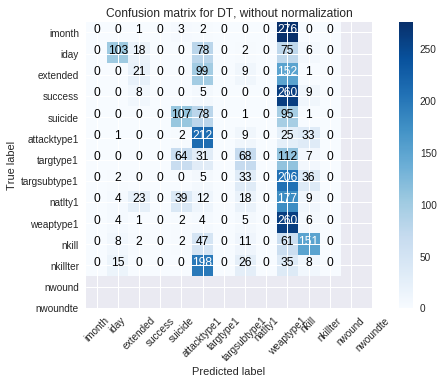

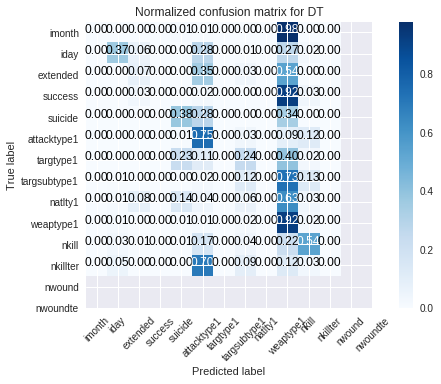


2019-01-28 22:56:50.536568

CPU times: user 2.71 s, sys: 1.02 s, total: 3.73 s
Wall time: 2.62 s


In [0]:
### MLP CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

# Testando outro tratamento de valores inválidos

Para aplicação do modelo não pode existir a presença de valores infinitos ou NaN, para tal decidimos utilizar a estratégia "most frequent" para resolver este problema, esta abordagem substitui todos os valores inválidos pelo mais comum válido existente na coluna.
De modo a avaliar a existência de uma possível influência destes valores trocados, vamos testar agora os modelos com a remoção completa de linhas que contenham valores inválidos.

In [0]:
### DATA PREPARATION ###

df_balanced = df.loc[0:,['region','imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
df_predict_balanced = pd.DataFrame(columns =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte'])

features = list(df_balanced.columns[1:])
df_balanced.replace([np.inf, -np.inf], np.nan)
df_balanced.dropna(inplace = True)
df_balanced.reset_index(drop=True, inplace = True)

y_balanced = df_balanced['region']
X_balanced = df_balanced[features]

if(np.any(np.isnan(X_balanced)) == False and np.all(np.isfinite(X_balanced)) == True):
  print("All invalid values removed")
  
if(np.any(np.isnan(df_balanced)) == False and np.all(np.isfinite(df_balanced)) == True):
  print("All invalid values removed")
  
# divisao train / test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split( X_balanced, y_balanced, test_size=0.2, random_state=42)  

print("\n" + str(now) + "\n") 

All invalid values removed
All invalid values removed

2019-01-28 19:20:46.794961



In [0]:
regionCounter = df_balanced['region'].tolist()
region_dict = {}

for i in (regionCounter):
  if i not in region_dict:
    region_dict[i] = 1
  else:
    region_dict[i] += 1

print(region_dict)
print("\n" + str(now) + "\n") 

{1: 1937, 8: 3334, 4: 198, 3: 2633, 6: 32765, 11: 9876, 5: 8754, 10: 35569, 9: 3775, 12: 91, 2: 176, 7: 256}

2019-01-28 19:20:46.794961



Novo balanceamento de dados vai ser feito com 91 entries por região

In [0]:
### Criação de dataframe, df_predict_balanced, que contém os valores a avaliar no predict ###
### Criação de realValueArray que contém os valores reais da região correspondentes a cada linha de df_predict_balanced ###

entry_dict = {}
testPredictArray = []
realValueArray = []
counter = 0
i = 0

for i in regionCounter:
  if i not in entry_dict:
    entry_dict[i] = 1   
    entry_val = X_balanced.loc[counter:counter,['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
    df_predict_balanced = df_predict_balanced.append(entry_val.loc[counter],ignore_index=True)
    realValueArray.append(df_balanced.loc[counter:counter,['region']].region.item())    

  else:
    if entry_dict[i] < 91:
      entry_dict[i] += 1
      entry_val = X_balanced.loc[counter:counter,['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']]
      df_predict_balanced = df_predict_balanced.append(entry_val.loc[counter],ignore_index=True) 
      realValueArray.append(df_balanced.loc[counter:counter,['region']].region.item())

  counter += 1

print("\n" + str(now) + "\n")        


2019-01-28 19:20:46.794961



#DECISION TREE - BALANCED DROP NAN

In [0]:
## Using cross validation to find optimal hyper-parameter value for min_samples_split // DECISION TREE
%%time
sample_split = 20
score_result = []
highest_score_test = 0

for i in range (15):
  dt = DecisionTreeClassifier(min_samples_split=sample_split, random_state=99)
  scores = cross_val_score(dt,X_train_balanced,y_train_balanced,cv=5)
  print("Average value for "+ str(sample_split) + " is : " + str(scores.mean()))
  score_result.append(scores.mean())      
  
  if(scores.mean() > highest_score_test):
    highest_score_test = scores.mean()
    print(str(sample_split) + " Is the new best tree split with score test: " + str(highest_score_test)+"\n")
    
  sample_split +=4
  
print(score_result)
print("\n" + str(now) + "\n")

Average value for 20 is : 0.9733049794805255
20 Is the new best tree split with score test: 0.9733049794805255

Average value for 24 is : 0.9734810888205514
24 Is the new best tree split with score test: 0.9734810888205514

Average value for 28 is : 0.9736950052149258
28 Is the new best tree split with score test: 0.9736950052149258

Average value for 32 is : 0.9735440910934304
Average value for 36 is : 0.9736195897066373
Average value for 40 is : 0.9735063307219693
Average value for 44 is : 0.9731541009548529
Average value for 48 is : 0.9729527647425191
Average value for 52 is : 0.9728395073361853
Average value for 56 is : 0.9726256985365751
Average value for 60 is : 0.9720723098130014
Average value for 64 is : 0.9716697149384192
Average value for 68 is : 0.9712545707385404
Average value for 72 is : 0.9710909727560038
Average value for 76 is : 0.9710029097829158
[0.9733049794805255, 0.9734810888205514, 0.9736950052149258, 0.9735440910934304, 0.9736195897066373, 0.9735063307219693, 0.9

In [0]:
### DECISION TREE ###
%%time
dt = DecisionTreeClassifier(min_samples_split=28, random_state=99)
dt.fit(X_train_balanced, y_train_balanced)

score_train = dt.score(X_train_balanced, y_train_balanced)
score_test = dt.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train))
print("Score test: " + str(score_test) + "\n")
print("\n" + str(now) + "\n") 


Score train: 0.9804757771320024
Score test: 0.9730790519800735


2019-01-28 19:20:46.794961

CPU times: user 417 ms, sys: 2.96 ms, total: 420 ms
Wall time: 421 ms


In [0]:
### DECISION TREE PREDICTION TEST ###
%%time
real_value_txt = []
counter = 0
correct = 0 

for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = dt.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 1092, total precision is : " + str(precision))
print("\n" + str(now) + "\n")  

930 correct guesses out of 1092, total precision is : 85.16483516483517

2019-01-28 19:20:46.794961

CPU times: user 8.55 ms, sys: 1.01 ms, total: 9.56 ms
Wall time: 13.1 ms


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.8516483516483517
Specificity or true negative rate; TNR= 0.9865134865134865
Precision or positive predictive value; PPV= 0.8675133180410376
Negative predictive value; NPV = 0.9866455800541812
Fall out or false positive rate; FPR= 0.013486513486513488
False negative rate; FNR=0.14835164835164835
False discovery rate, FDR= 0.13248668195896243



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.8516483516483517
Specificity or true negative rate; TNR= 0.9865134865134865
Precision or positive predictive value; PPV= 0.8675133180410376
Negative predictive value; NPV = 0.9866455800541812
Fall out or false positive rate; FPR= 0.013486513486513488
False negative rate; FNR=0.1483516483516483
False discovery rate, FDR= 0.13248668195896238




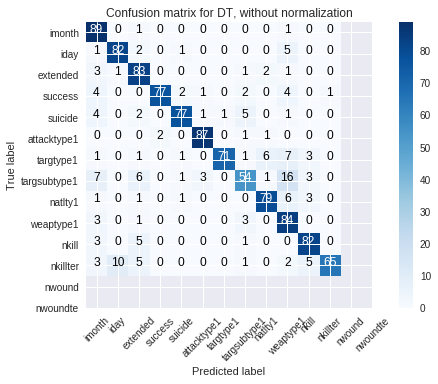

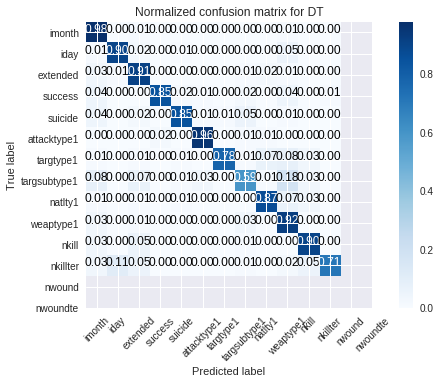


2019-01-28 19:20:46.794961

CPU times: user 2.07 s, sys: 931 ms, total: 3 s
Wall time: 1.91 s


In [0]:
### DECISION TREE CONFUSION MATRIX ###
%%time
# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#RANDOM FOREST - BALANCED DROP NAN

In [0]:
### RANDOM FOREST ###
%%time

rf = RandomForestClassifier(max_depth=38, random_state=0,n_estimators=950)
rf.fit(X_train_balanced,y_train_balanced)

score_train_balanced = rf.score(X_train_balanced, y_train_balanced)
score_test_balanced = rf.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train_balanced))
print("Score test: " + str(score_test_balanced))
print("\n" + str(now) + "\n")

Score train: 0.9997483991898454
Score test: 0.9201932269913954

2019-01-28 19:20:46.794961

CPU times: user 2min 40s, sys: 2 s, total: 2min 42s
Wall time: 2min 42s


In [0]:
##  RANDOM FOREST prediction test ##
%%time
real_value_txt = []
counter = 0
correct = 0 
for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = rf.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
        #print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 3384, total precision is : " + str(precision))
print("\n")  

973 correct guesses out of 3384, total precision is : 89.1025641025641


CPU times: user 720 ms, sys: 3.98 ms, total: 724 ms
Wall time: 729 ms


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.891025641025641
Specificity or true negative rate; TNR= 0.9900932400932402
Precision or positive predictive value; PPV= 0.9067983608321515
Negative predictive value; NPV = 0.9901742775559964
Fall out or false positive rate; FPR= 0.009906759906759906
False negative rate; FNR=0.10897435897435896
False discovery rate, FDR= 0.09320163916784853



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.8910256410256411
Specificity or true negative rate; TNR= 0.9900932400932403
Precision or positive predictive value; PPV= 0.9067983608321515
Negative predictive value; NPV = 0.9901742775559964
Fall out or false positive rate; FPR= 0.009906759906759903
False negative rate; FNR=0.10897435897435898
False discovery rate, FDR= 0.09320163916784852




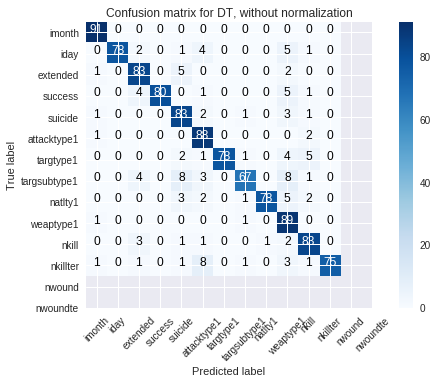

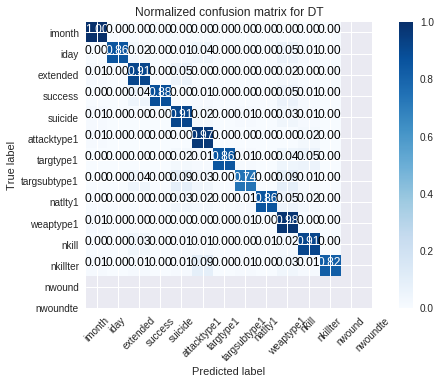


2019-01-28 19:20:46.794961

CPU times: user 2.32 s, sys: 1.02 s, total: 3.34 s
Wall time: 2.19 s


In [0]:
### RANDOM FOREST CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#MLP - BALANCED DROP NAN

In [0]:
### MLP - Multi-layer Perceptron using optimal parameters found ###
%%time
mlp = MLPClassifier(solver='adam', alpha=10,hidden_layer_sizes=(6, 10), random_state=1,max_iter = 550)
mlp.fit(X_train_balanced,y_train_balanced)

score_train_balanced = mlp.score(X_train_balanced, y_train_balanced)
score_test_balanced = mlp.score(X_test_balanced, y_test_balanced)

print("Score train: " + str(score_train_balanced))
print("Score test: " + str(score_test_balanced))

print("\n" + str(now) + "\n")

Score train: 0.596042319256268
Score test: 0.5972424898102954

2019-01-28 19:20:46.794961

CPU times: user 2min 21s, sys: 211 ms, total: 2min 21s
Wall time: 2min 21s


In [0]:
##  MLP prediction test ##
%%time
real_value_txt = []
counter = 0
correct = 0 
for i in realValueArray:
  for x,z in loaded_region_dict.items():
    if z == i:
      real_value_txt.append(x)

test_result = mlp.predict(df_predict_balanced)

for i in test_result:
  for x,z in loaded_region_dict.items():
    if z == i:
      if x == real_value_txt[counter]:
        correct +=1
        #print("Real region is : " + real_value_txt[counter] +"\t\tPredicted region is: " + x)
      counter +=1
      
precision = (correct/len(df_predict_balanced)) * 100
print(str(correct) + " correct guesses out of 3384, total precision is : " + str(precision))
print("\n" + str(now) + "\n")  

127 correct guesses out of 3384, total precision is : 11.63003663003663

2019-01-28 19:20:46.794961

CPU times: user 8.7 ms, sys: 987 µs, total: 9.69 ms
Wall time: 12.1 ms


Default matrix 

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.11630036630036629
Specificity or true negative rate; TNR= 0.9196636696636697
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9228591364303517
Fall out or false positive rate; FPR= 0.08033633033633032
False negative rate; FNR=0.8836996336996338
False discovery rate, FDR= nan



Normalized matrix

Sensitivity, hit rate, recall, or true positive rate; TPR= 0.11630036630036629
Specificity or true negative rate; TNR= 0.9196636696636697
Precision or positive predictive value; PPV= nan
Negative predictive value; NPV = 0.9228591364303517
Fall out or false positive rate; FPR= 0.08033633033633035
False negative rate; FNR=0.8836996336996338
False discovery rate, FDR= nan




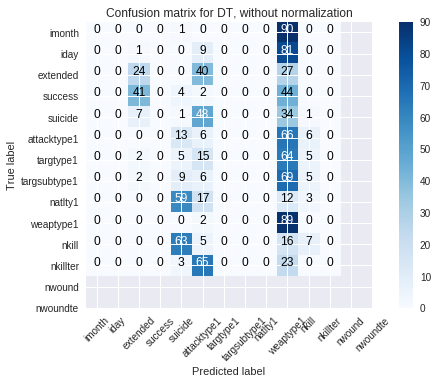

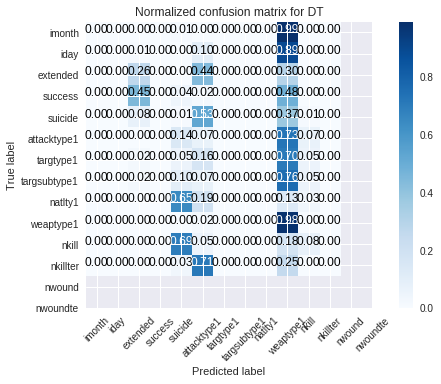


2019-01-28 19:20:46.794961

CPU times: user 2.29 s, sys: 1.05 s, total: 3.34 s
Wall time: 2.16 s


In [0]:
### MLP CONFUSION MATRIX ###
%%time

# Compute confusion matrix
matrix = confusion_matrix(realValueArray, test_result)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
columns_mat =['imonth','iday','extended','success','suicide','attacktype1','targtype1','targsubtype1','natlty1','weaptype1','nkill','nkillter','nwound','nwoundte']
print("Default matrix \n")
plot_confusion_matrix(matrix, classes=columns_mat, title='Confusion matrix for DT, without normalization')

# Plot normalized confusion matrix
plt.figure()
print("\n\n\nNormalized matrix\n")
plot_confusion_matrix(matrix, classes=columns_mat, normalize=True,title='Normalized confusion matrix for DT')
print("\n")
plt.show()
print("\n" + str(now) + "\n") 

#Resumindo

## Porquê estes modelos?

Escolhemos os modelos Decision Tree e Random Forest devido à sua simplicidade, mas também devido à possibilidade de comparações entre ambos. Para o nosso terceiro modelo escolhemos Multi Layer Perceptron(MLP) devido ao contraste possível entre este e os modelos Decision Tree e Random Forest em termos de complexidade.

## Cross-validation

Para cada modelo é feito uma avaliação dos seus hiper-parâmetros através de múltiplas iterações onde estes são continuamente incrementados e avaliados com a chamada da função "cross_val_score". Os parâmetros com melhor pontuação são escolhidos para o fit final de cada modelo. Infelizmente não conseguimos executar esta avaliação em todos os casos existentes, devido ao elevado tempo de execução de alguns modelos, especificamente Random Forest e MLP.

## Learning-curve

A criação da learning-curve, permite-nos avaliar os modelos em relação à sua necessidade de dados, ou seja a quantidade de dados necessária para o funcionamento eficiente sem o excessivo tratamento de dados.

## Modificações no dataset

Foram feitas 3 modificações ao dataset original:
- One hot encoding
- Balanceamento de dados
- Remoção de NaNs

### One hot encoding
Várias das colunas do dataset no seu estado original encontram-se em "pares" de valores numéricos e de texto, features cujo valor é uma variável de texto têm uma coluna correspondente com um identificador (ex:  'attacktype1' : 1  'attacktype_txt' : 'assassination').
One hot encoding foi feito para eliminar a possibilidade de existir associações erradas entre valores, "semelhança/proximidade" de valores.
Foi aplicado one hot enconding a todas as labels do dataset (excepto a target label) de maneira a obter um resultado *unbiased*. 
A desvantagem deste tratamento é excessivo aumento no número de colunas/features e consequentemente o tempo de execução dos modelos e dos seus testes/avaliações.

### Balanceamento de dados
No dataset original existe uma grande discrepância em termos da quantidade de *entries* por região. A região com maior número de ataques, 'Middle East & North Africa' tem um total de 50474 de ataques registados enquanto que a região com menor número, 'Australasia & Oceania' tem somente 282 registos. Foi então feito um balanceamento do dataset de modo a que todas as regiões existentes tenham exatamente a mesma quantidade de *entries*, menor número existente, 282. Este balanceamento foi feito de modo a eliminar possíveis "maus hábitos" dos modelos em relação ao *fit* dos dados. 

### Remoção de NaNs
Todos os modelos precisam do tratamento de valores inválidos para serem aplicados, features com valor 'NaN' ou 'Infinite' são impossíveis de ser avaliados, para tal nós escolhemos a abordagem de substituir todos estes valores pelo mais frequente da coluna. No entanto esta abordagem pode levar a associações erradas devido a substituição *biased* destes valores. Para avaliar esta possibilidade, foi feita uma comparação com uma nova dataset onde em vez de os valores inválidos serem substituidos, a sua linha é completamente removida.

### Precision-recall
Tivemos uma enorme dificuldade tanto no cálculo como na interpretação dos valores de precision e recall diretamente relacionados com o tipo de modelo utilizado e um resultado de target não binário. 
Valores obtidos para Decision Tree com one hot encoding:
- Precision : 0.6016931142947237
- Recall : 0.8725
- Precision por class ( demonstrado no codigo)

De notar, a incoerência de resultados onde o score do modelo obteu um valor igual ao recall, 0.8725, no entanto a precisão foi significativamente mentor, aproximadamente 0.6017

## Resultados finais

### Decision Tree

Os valores finais da precisão do modelo decision tree para as várias análises foram:

- Dataset original, precisão - 95.78074863366925
- Dataset one hot encoded, precisão - 96.11648348019439
- Dataset balanceado, precisão - 82.50591016548464
- Dataset balanceado sem NaNs, precisão - 85.16483516483517

### Random Forest

Os valores finais da precisão do modelo random forest para as várias análises foram:

- Dataset original, precisão - 96.67347309442955
- Dataset one hot encoded, precisão - 95.82973289816226
- Dataset balanceado, precisão - 93.26241134751773
- Dataset balanceado sem NaNs, precisão - 89.1025641025641

### Multi Layer Perceptron - MLP

Os valores finais da precisão do modelo MLP para as várias análises foram:

- Dataset original, precisão - 56.87678531132527
- Dataset one hot encoded, precisão - 56.95659113549928
- Dataset balanceado, precisão - 26.21158392434988
- Dataset balanceado sem NaNs, precisão - 11.63003663003663




#Conclusões finais

Os valores obtidos para os modelos Decision Tree e Random Forest para as várias análises encontram-se dentro dos intervalos esperados de variação entre eles. No geral o modelo Random Forest apresenta melhores resultados, no entanto o seu tempo de execução é consideravelmente maior pelo que no nosso contexto de trabalho, o modelo Decision Tree é o ideal para o estudo e consequente avaliação do nosso dataset.

Em relação ao modelo Multi Layer Perceptron, o nosso contexto de estudo não está preparado para trabalhar com um modelo desta complexidade. As análises dos seus hiper parâmetros têm um tempo de execução extremamente elevado o que impossibilita os testes consecutivos para encontrar os valores ideais para estes, explicando assim os pobres valores de precisão obtidos nas várias análises ao dataset.

